In [1]:
from astropy.io import fits
import numpy as np
import copy
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [2]:
import sys
sys.path.append('/home/elwo3899/py_mesa_reader')
import mesa_reader as m
path = '/home/elwo3899/Tutorial/pisn/'

Text(0, 0.5, 'log Luminosity')

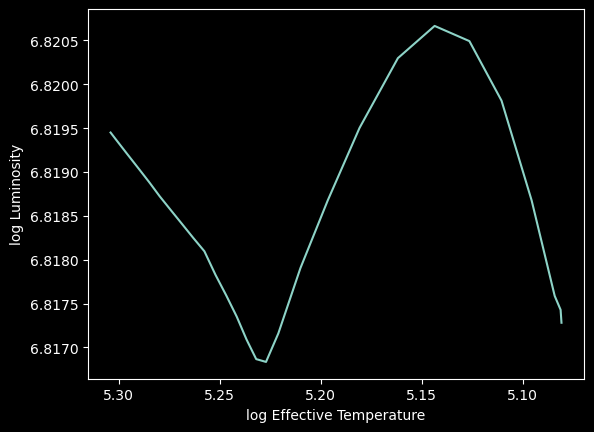

In [3]:
h = m.MesaData(file_name=path+'LOGS/history.data')
plt.plot(h.log_Teff, h.log_L)
plt.gca().invert_xaxis()
plt.xlabel('log Effective Temperature')
plt.ylabel('log Luminosity')

In [4]:
h.bulk_names

('model_number',
 'num_zones',
 'star_age',
 'star_age_sec',
 'star_age_min',
 'star_age_hr',
 'star_age_day',
 'time_step',
 'time_step_sec',
 'time_step_days',
 'log_dt',
 'log_dt_sec',
 'log_dt_days',
 'star_mass',
 'log_xmstar',
 'log_abs_mdot',
 'mass_conv_core',
 'conv_mx1_top',
 'conv_mx1_bot',
 'conv_mx2_top',
 'conv_mx2_bot',
 'mx1_top',
 'mx1_bot',
 'mx2_top',
 'mx2_bot',
 'log_LH',
 'log_LHe',
 'log_LZ',
 'log_Lnuc',
 'pp',
 'cno',
 'tri_alpha',
 'epsnuc_M_1',
 'epsnuc_M_2',
 'epsnuc_M_3',
 'epsnuc_M_4',
 'epsnuc_M_5',
 'epsnuc_M_6',
 'epsnuc_M_7',
 'epsnuc_M_8',
 'he_core_mass',
 'he_core_radius',
 'co_core_mass',
 'co_core_radius',
 'one_core_mass',
 'fe_core_mass',
 'fe_core_radius',
 'neutron_rich_core_mass',
 'kh_timescale',
 'effective_T',
 'log_Teff',
 'luminosity',
 'log_L',
 'log_R',
 'log_g',
 'log_L_div_Ledd',
 'lum_div_Ledd',
 'v_surf_km_s',
 'v_div_csound_surf',
 'surf_avg_j_rot',
 'surf_avg_omega',
 'surf_avg_omega_crit',
 'surf_avg_omega_div_omega_crit',
 'sur

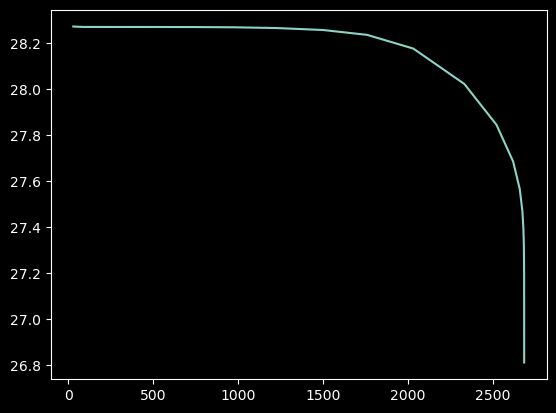

In [5]:
plt.plot(h.star_age, h.total_mass_he4)

In [6]:
p1 = m.MesaData(file_name=path+'LOGS/profile1.data')
p2 = m.MesaData(file_name=path+'LOGS/profile2.data')
p3 = m.MesaData(file_name=path+'LOGS/profile3.data')
p4 = m.MesaData(file_name=path+'LOGS/profile4.data')
p5 = m.MesaData(file_name=path+'LOGS/profile5.data')
p6 = m.MesaData(file_name=path+'LOGS/profile6.data')
p7 = m.MesaData(file_name=path+'LOGS/profile7.data')
p8 = m.MesaData(file_name=path+'LOGS/profile8.data')
p9 = m.MesaData(file_name=path+'LOGS/profile9.data')
p10 = m.MesaData(file_name=path+'LOGS/profile10.data')
p11 = m.MesaData(file_name=path+'LOGS/profile11.data')
p12 = m.MesaData(file_name=path+'LOGS/profile12.data')
profL = [p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12]

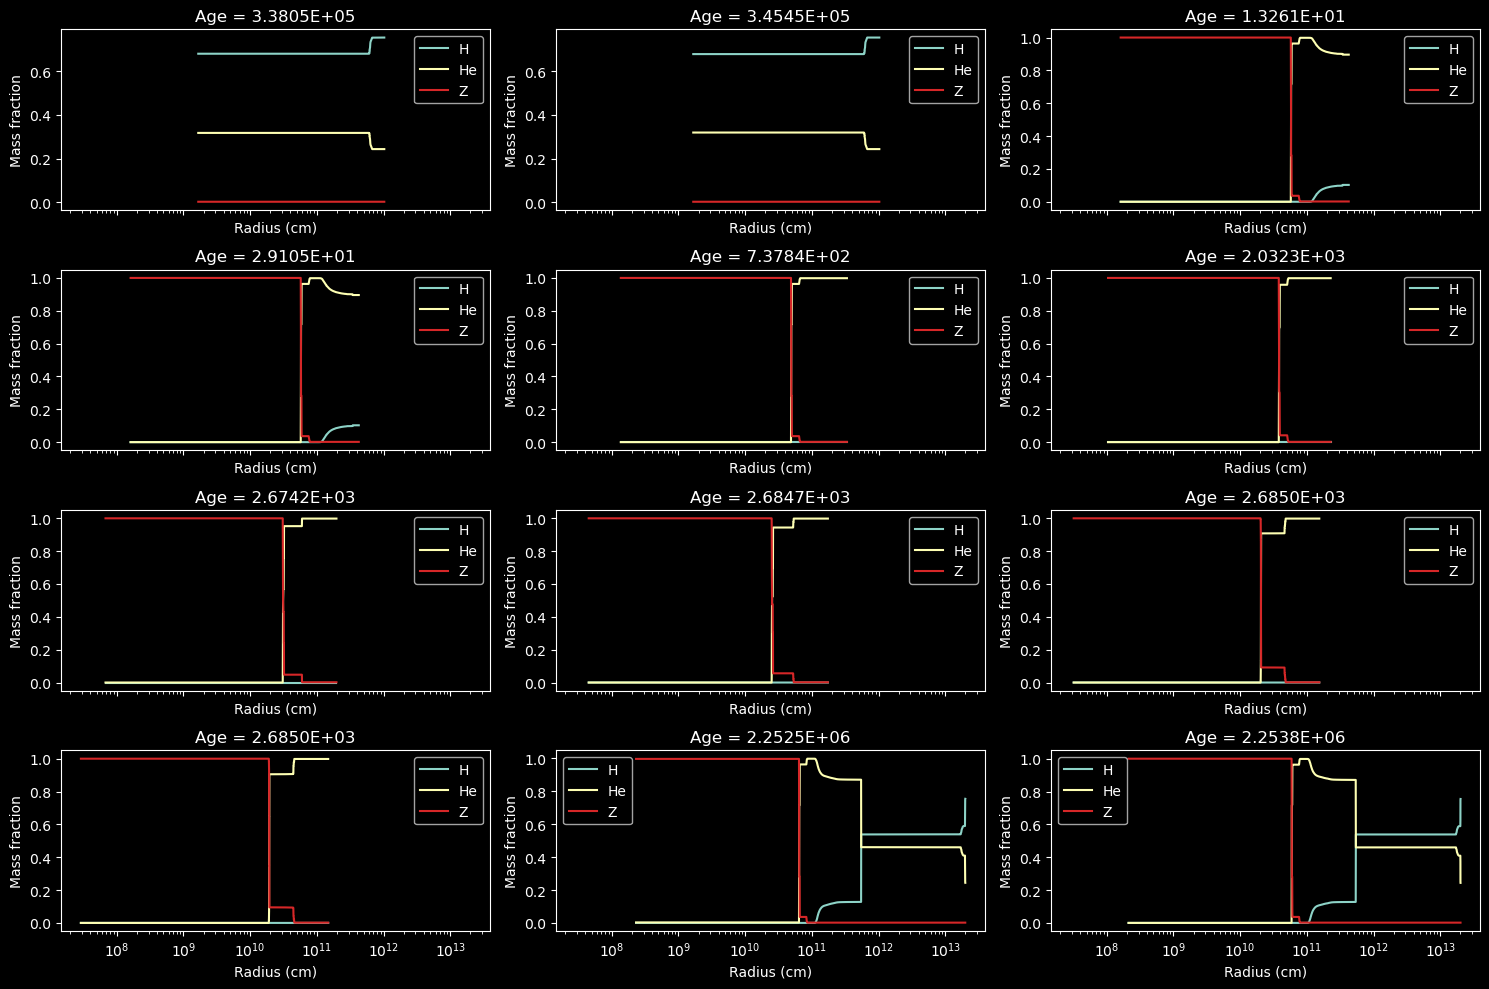

In [7]:
fig, ax = plt.subplots(4, 3, figsize=(15,10), tight_layout=True, sharex=True)
fax = ax.ravel()
for i, data in enumerate(profL):
    fax[i].semilogx(data.radius * 7e10, data.x_mass_fraction_H, label='H')
    fax[i].semilogx(data.radius * 7e10, data.y_mass_fraction_He, label='He')
    fax[i].semilogx(data.radius * 7e10, data.z_mass_fraction_metals, color='tab:red', label='Z')
    fax[i].set(xlabel=r'Radius (cm)', ylabel='Mass fraction', title=f'Age = {data.star_age:.4E}')
    fax[i].legend()
fig.show()

Text(0, 0.5, 'log Luminosity')

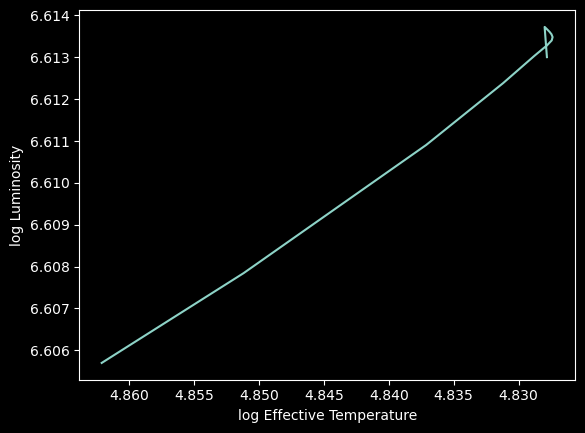

In [8]:
pathr = '/home/elwo3899/25M_Study/pisn_rotation/'
h1 = m.MesaData(file_name=pathr+'LOGS/history.data')
plt.plot(h1.log_Teff, h1.log_L)
plt.gca().invert_xaxis()
plt.xlabel('log Effective Temperature')
plt.ylabel('log Luminosity')

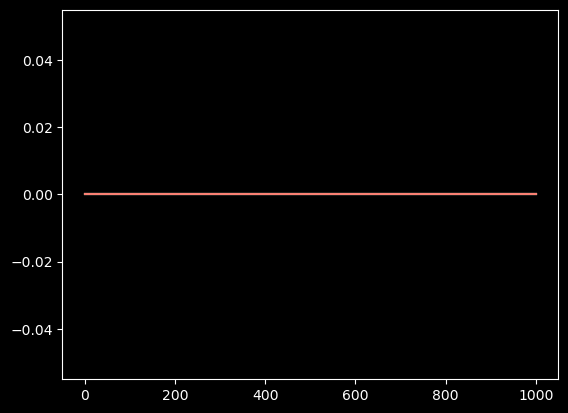

In [9]:
plt.plot(h1.star_age, h1.co_core_mass)
plt.plot(h1.star_age, h1.he_core_mass)
plt.plot(h1.star_age, h1.one_core_mass)
plt.plot(h1.star_age, h1.one_core_mass)

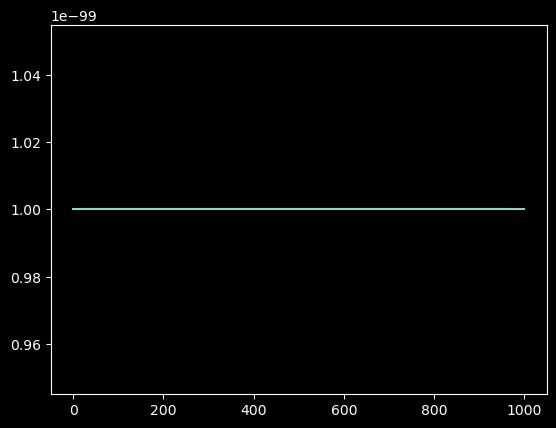

In [10]:
plt.plot(h1.star_age, h1.surface_c12)

In [11]:
pathZAMS = '/home/elwo3899/25M_Study/SAVED_LOGS/TESTING_LOGS/LOGS_ROT_0.2_200Msun_ZAMS/'
pathHe = '/home/elwo3899/25M_Study/SAVED_LOGS/LOGS_ROT_0.2_He/'
pathC = '/home/elwo3899/25M_Study/SAVED_LOGS/TESTING_LOGS/LOGS_ROT_0.2_200Msun_End_of_C/'
pathSN = '/home/elwo3899/25M_Study/SAVED_LOGS/TESTING_LOGS/LOGS_ROT_0.2_200Msun_to_PISN/'
prof_ZAMS = [m.MesaData(file_name=f"{pathZAMS}profile{i}.data") for i in range(1, 3)]
profHe = [m.MesaData(file_name=f"{pathHe}profile{i}.data") for i in range(1, 9)]
profC = [m.MesaData(file_name=f"{pathC}profile{i}.data") for i in range(1, 10)]
prof_PISN = [m.MesaData(file_name=f"{pathSN}profile{i}.data") for i in range(1, 10)]

profL = [prof_ZAMS, profHe, profC, prof_PISN]

In [12]:
prof_together = prof_ZAMS + profHe + profC + prof_PISN
len(prof_together)

28

In [13]:
def plot_mFracs_for_profile(ax, data, group_name, i, prof_num = None):
    ax[i].semilogx(data.radius * 7e10, data.x_mass_fraction_H, label='H')
    ax[i].semilogx(data.radius * 7e10, data.y_mass_fraction_He, label='He')
    ax[i].semilogx(data.radius * 7e10, data.z_mass_fraction_metals, color='tab:red', label='Z')
    if prof_num == None:
        ax[i].set(xlabel=r'Radius (cm)', ylabel='Mass fraction', title=f'{group_name} Profile {i+1} Age={data.star_age:.4E} yrs')
    else:
        ax[i].set(xlabel=r'Radius (cm)', ylabel='Mass fraction', title=f'{group_name} Profile {prof_num} Age={data.star_age:.4E} yrs')
    ax[i].legend()

In [14]:
import math
def plot_mass_frac(prof_list, group_name=None):
    prof_len = len(prof_list)
    cols = math.ceil(math.sqrt(prof_len))
    rows = math.ceil(prof_len / cols)
    
    fig, ax = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), tight_layout=True)
    
    fax = ax.ravel() if isinstance(ax, np.ndarray) else [ax]
    
    
    for i, data in enumerate(prof_list):
        plot_mFracs_for_profile(fax, data, group_name, i)
    # Turn off any unused subplots
    for j in range(prof_len, len(fax)):
        fax[j].axis('off')  # Hide empty subplots
    plt.show()

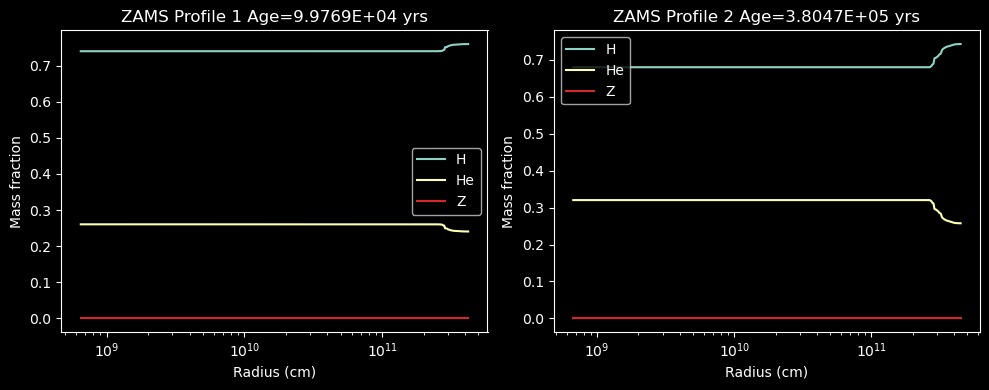

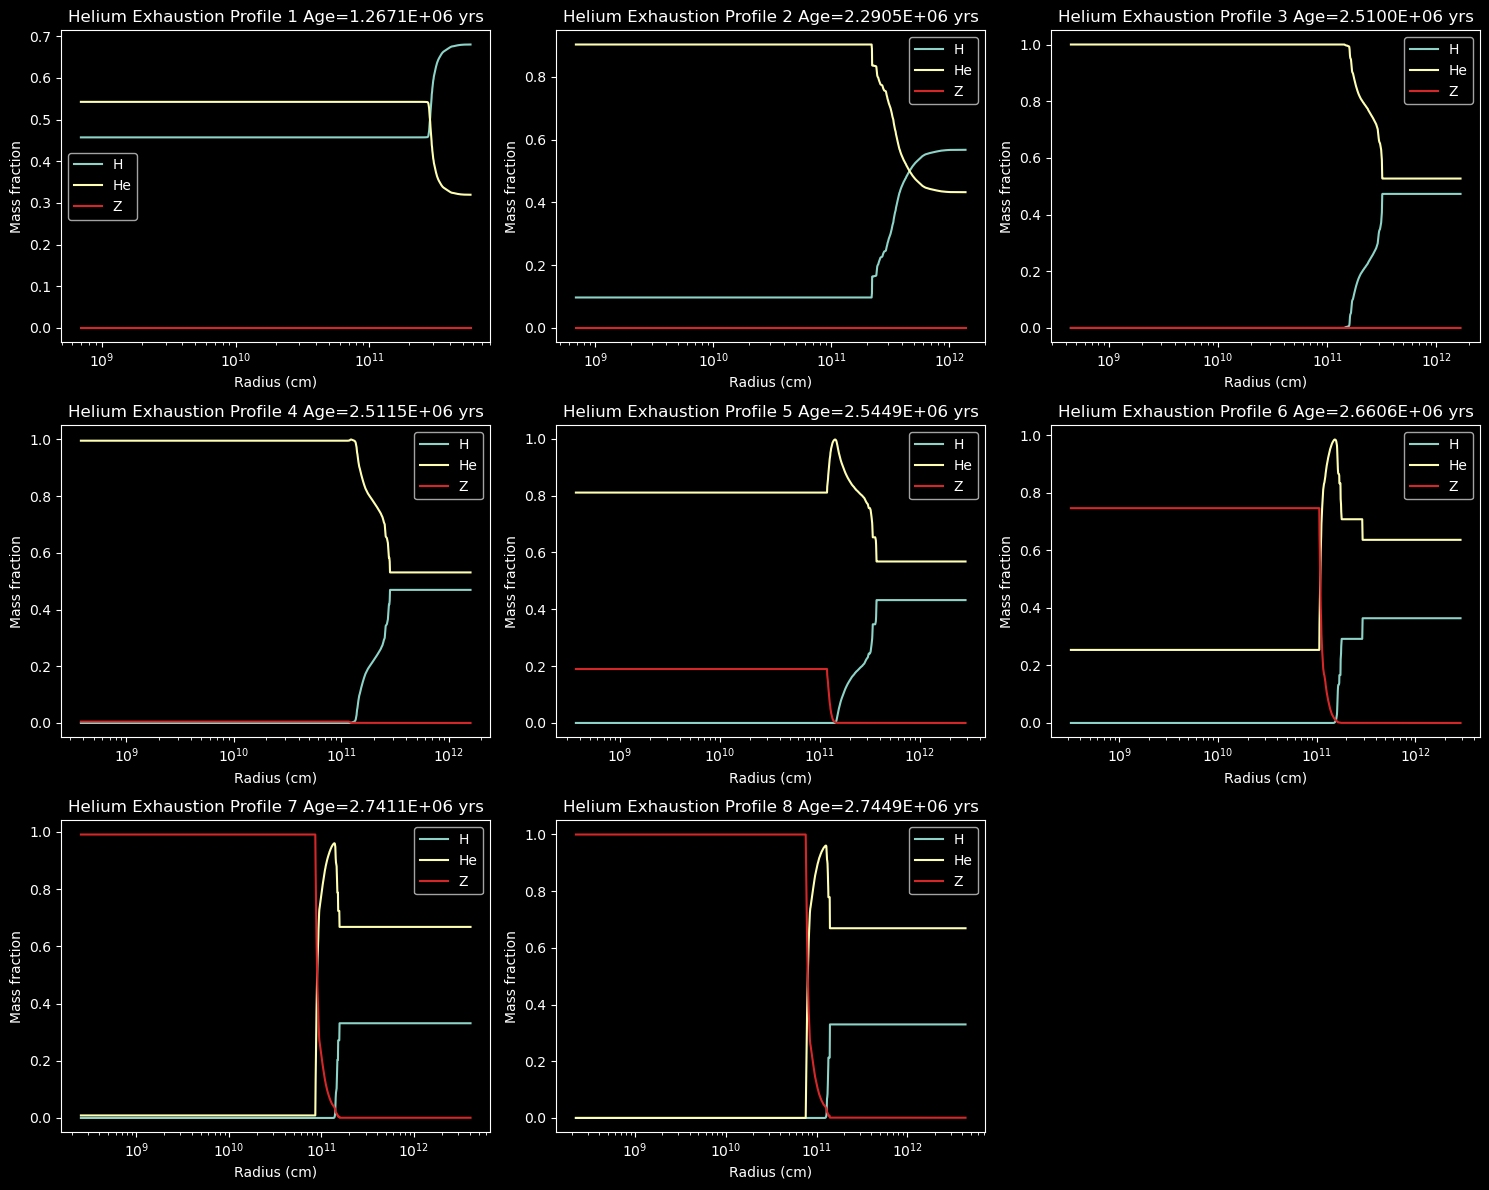

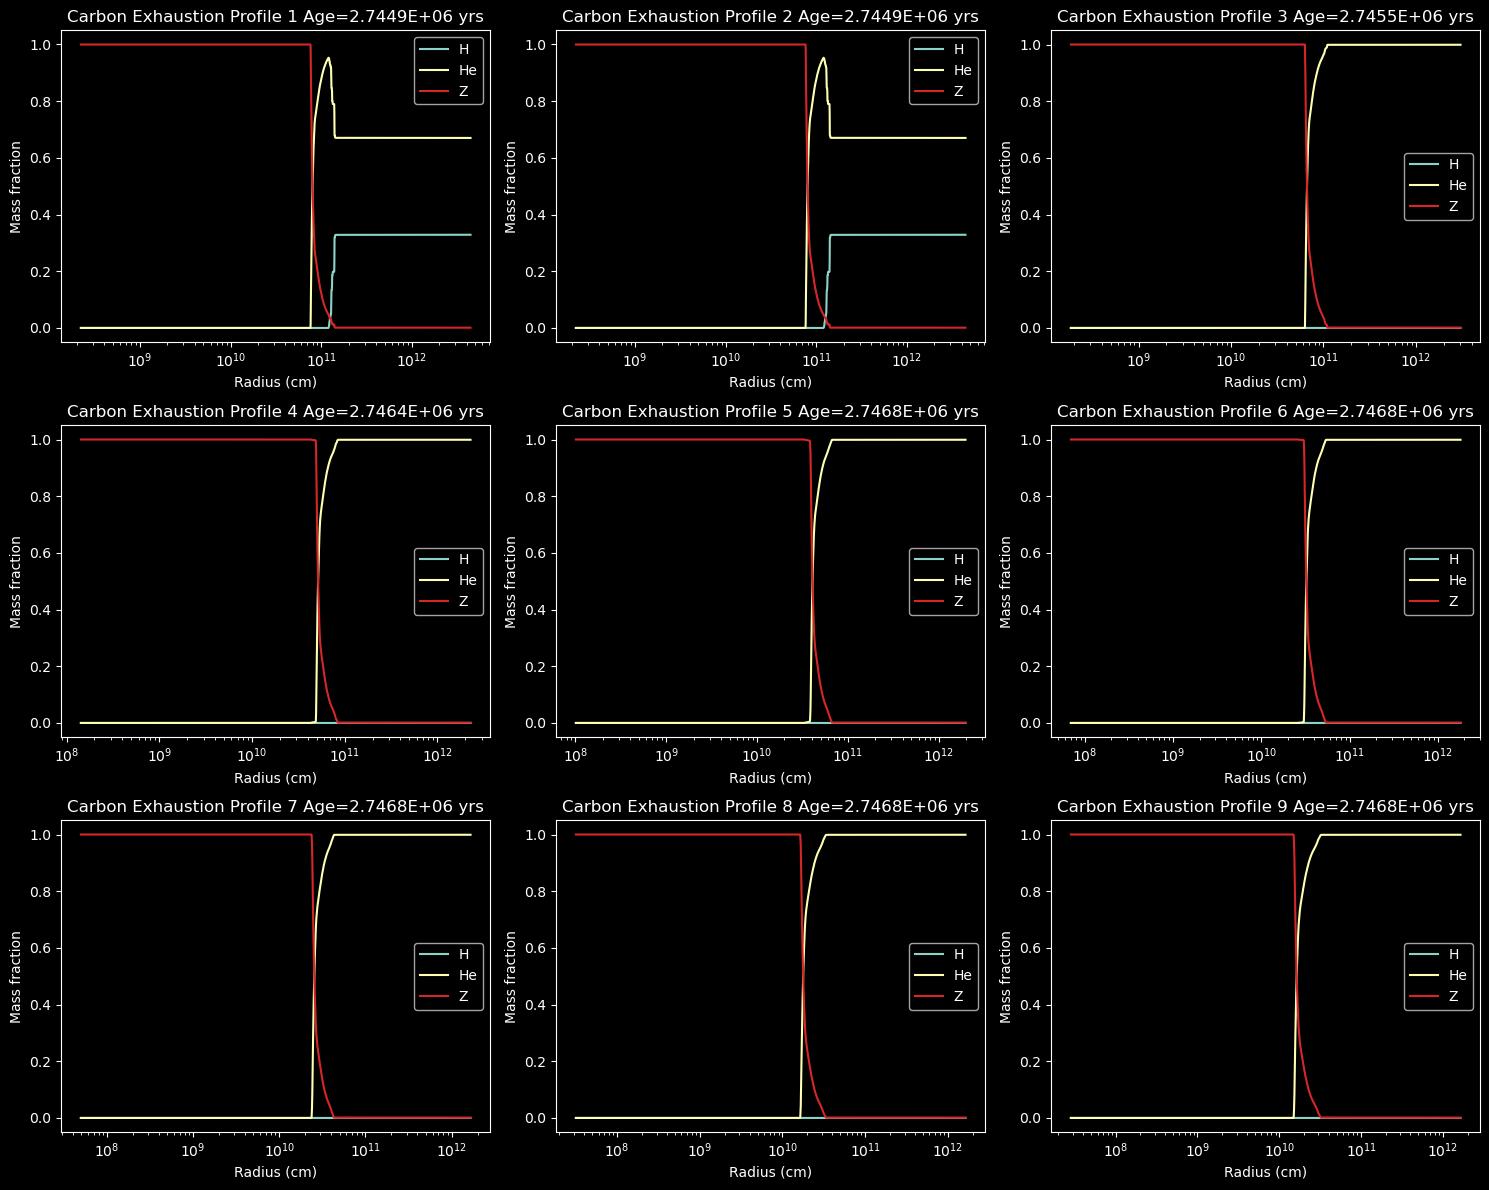

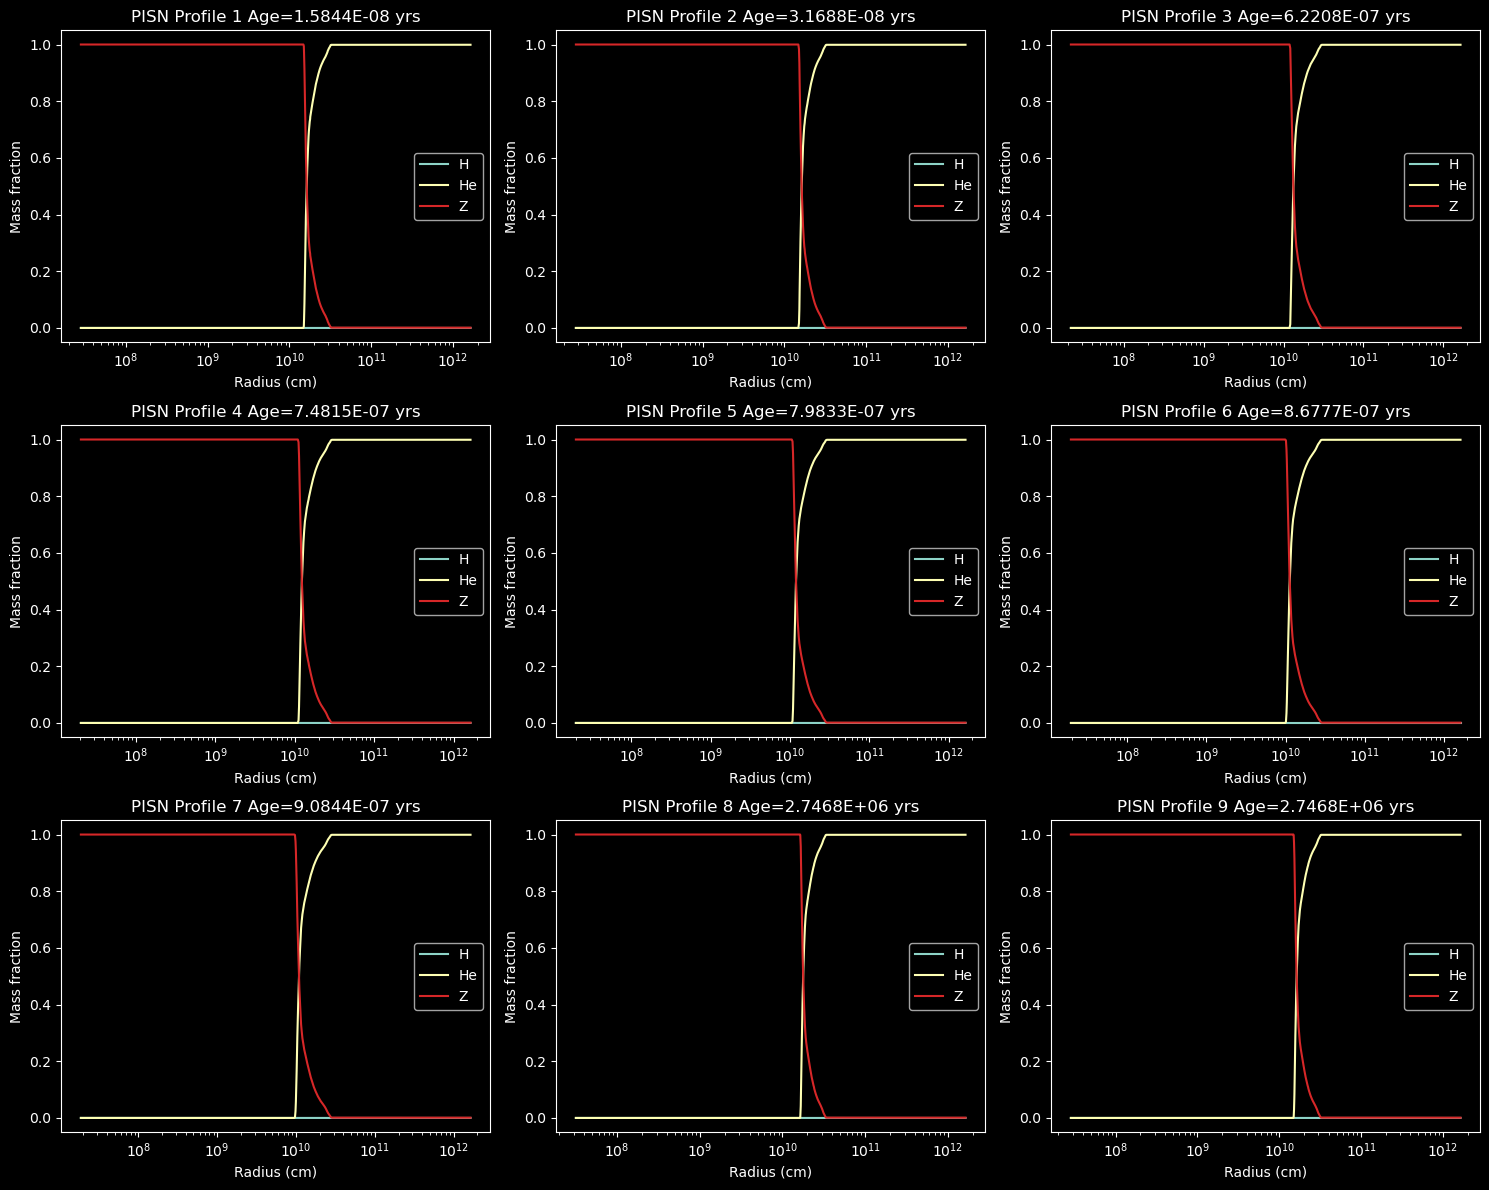

In [15]:
plot_mass_frac(prof_ZAMS, 'ZAMS')
plot_mass_frac(profHe, 'Helium Exhaustion')
plot_mass_frac(profC, 'Carbon Exhaustion')
plot_mass_frac(prof_PISN, 'PISN')

In [16]:
def compare_plots(pZAMS=None, pHe=None, pC=None, PISN=None):
    
    profiles = []
    p_names = []
    prof_nums =[]
    if pZAMS is not None:
        profiles.append(prof_ZAMS[pZAMS-1])
        p_names.append("ZAMS")
        prof_nums.append(pZAMS)
    if pHe is not None:
        profiles.append(profHe[pHe-1])
        p_names.append("He")
        prof_nums.append(pHe)
    if pC is not None:
        profiles.append(profC[pC-1])
        p_names.append("C")
        prof_nums.append(pC)
    if PISN is not None:
        profiles.append(prof_PISN[PISN-1])
        p_names.append("PISN")
        prof_nums.append(PISN)
        
    print(profiles)
    
    if not profiles:
        print("No profiles provided for plotting.")
        return None
    
    
    fig, ax = plt.subplots(1, len(profiles), figsize=(len(profiles)*5, 5), tight_layout=True)
    fax = ax.ravel() if isinstance(ax, np.ndarray) else [ax]
    for i, data in enumerate(profiles):
        group_name = p_names[i]
        pnum = prof_nums[i]
        plot_mFracs_for_profile(fax, data, group_name, i, prof_num=pnum)
    
    
    
    plt.show()


[<mesa_reader.MesaData object at 0x7fa9603ac640>, <mesa_reader.MesaData object at 0x7fa95f6c6160>]


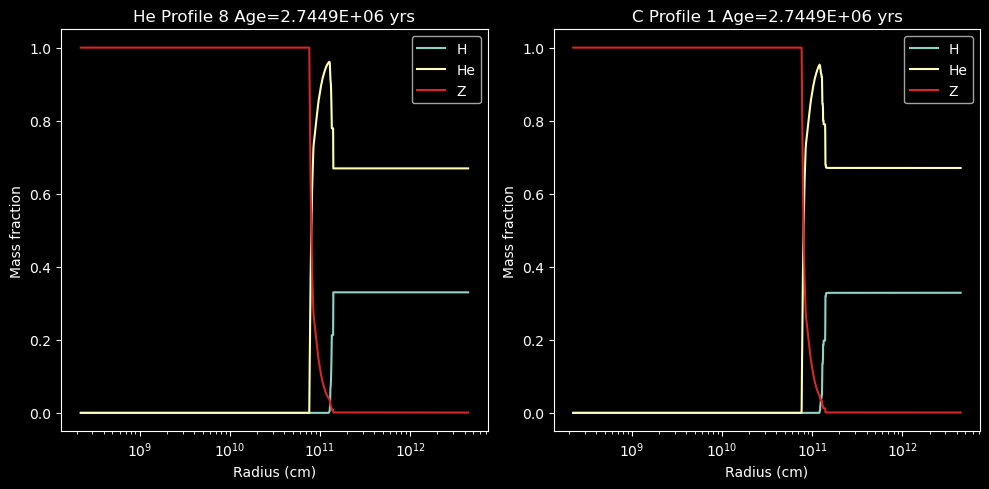

In [17]:
compare_plots(None, 8, 1, None)

In [18]:
hZAMS = m.MesaData(file_name=pathZAMS+'history.data')
hHe = m.MesaData(file_name=pathHe+'history.data')
hC = m.MesaData(file_name=pathC+'history.data')
hPISN = m.MesaData(file_name=pathSN+'history.data')

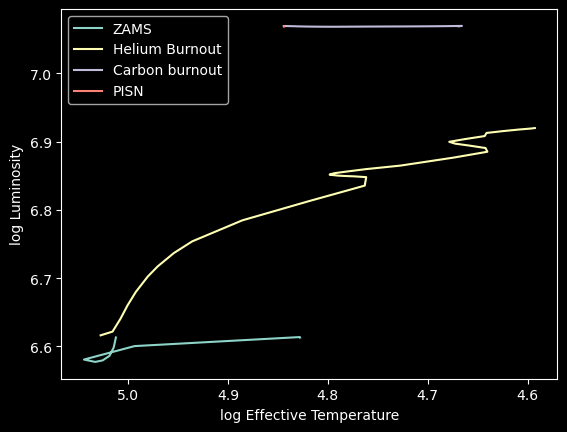

In [19]:
plt.plot(hZAMS.log_Teff, hZAMS.log_L, label='ZAMS')
plt.plot(hHe.log_Teff, hHe.log_L, label='Helium Burnout')
plt.plot(hC.log_Teff, hC.log_L, label='Carbon burnout')
plt.plot(hPISN.log_Teff, hPISN.log_L, label="PISN")
plt.gca().invert_xaxis()
plt.xlabel('log Effective Temperature')
plt.ylabel('log Luminosity')
plt.legend()

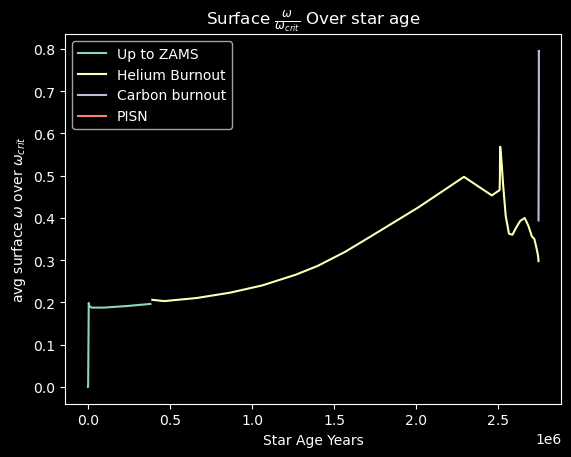

In [20]:
plt.plot(hZAMS.star_age, hZAMS.surf_avg_omega_div_omega_crit, label='Up to ZAMS')
plt.plot(hHe.star_age, hHe.surf_avg_omega_div_omega_crit, label='Helium Burnout')
plt.plot(hC.star_age, hC.surf_avg_omega_div_omega_crit, label='Carbon burnout')
plt.plot(hPISN.star_age, hPISN.surf_avg_omega_div_omega_crit, label="PISN")
plt.xlabel('Star Age Years')
plt.ylabel(r'avg surface $\omega$ over $\omega_{crit}$')
plt.title(r'Surface $\frac{\omega}{\omega_{crit}}$ Over star age')
plt.legend()

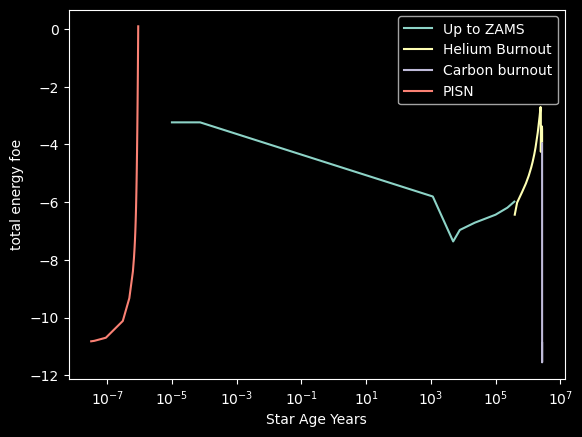

In [21]:
plt.plot(hZAMS.star_age, hZAMS.total_energy_foe, label='Up to ZAMS')
plt.plot(hHe.star_age, hHe.total_energy_foe, label='Helium Burnout')
plt.plot(hC.star_age, hC.total_energy_foe, label='Carbon burnout')
plt.plot(hPISN.star_age, hPISN.total_energy_foe, label="PISN")
plt.xlabel('Star Age Years')
plt.ylabel('total energy foe')
plt.xscale('log')
plt.legend()
test_age = hPISN.star_age + np.max(hC.star_age)

In [22]:
prof_ZAMS[1].bulk_names

('zone',
 'mass',
 'logR',
 'logT',
 'logRho',
 'logP',
 'x_mass_fraction_H',
 'y_mass_fraction_He',
 'z_mass_fraction_metals',
 'dm',
 'logdq',
 'dq_ratio',
 'q',
 'vel_km_per_s',
 'radius',
 'radius_cm',
 'logR_cm',
 'rmid',
 'velocity',
 'v_div_r',
 'pressure_scale_height',
 'mmid',
 'logxq',
 'dr',
 'log_dr',
 'dr_div_cs',
 'log_dr_div_cs',
 'acoustic_depth',
 'log_cell_collapse_time',
 'temperature',
 'energy',
 'logE',
 'rho',
 'entropy',
 'pressure',
 'logPgas',
 'pgas_div_ptotal',
 'eta',
 'mu',
 'grada',
 'gamma1',
 'free_e',
 'csound',
 'log_csound',
 'v_div_csound',
 'eps_grav',
 'eps_nuc',
 'non_nuc_neu',
 'pp',
 'cno',
 'tri_alpha',
 'c_alpha',
 'n_alpha',
 'o_alpha',
 'ne_alpha',
 'na_alpha',
 'mg_alpha',
 'si_alpha',
 's_alpha',
 'ar_alpha',
 'ca_alpha',
 'ti_alpha',
 'cr_alpha',
 'fe_co_ni',
 'c12_c12',
 'c12_o16',
 'o16_o16',
 'pnhe4',
 'photo',
 'ni56_co56',
 'co56_fe56',
 'other',
 'abar',
 'zbar',
 'z2bar',
 'ye',
 'x',
 'y',
 'z',
 'log_z',
 'neut',
 'h1',
 'prot',

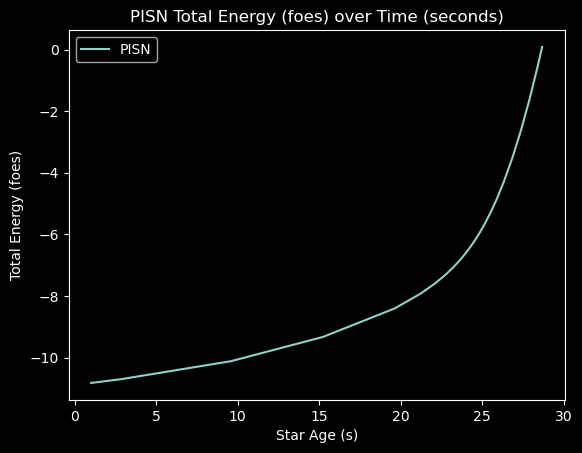

In [23]:
# foe is a unit of measurement equal to 10^51 ergs or 10^44 Joules aka supernova energy
#plt.plot(hZAMS.star_age, hZAMS.total_energy_foe, label='Up to ZAMS')
#plt.plot(hHe.star_age, hHe.total_energy_foe, label='Helium Burnout')
#plt.plot(hC.star_age, hC.total_energy_foe, label='Carbon burnout')
plt.plot(hPISN.star_age_sec, hPISN.total_energy_foe, label="PISN") 
plt.xlabel('Star Age (s)')
plt.ylabel('Total Energy (foes)')
plt.title('PISN Total Energy (foes) over Time (seconds)')
plt.legend()

In [24]:
path_04 = '/home/elwo3899/25M_Study/SAVED_LOGS/LOGS_ROT_0.4_He/'
prof_04 =  [m.MesaData(file_name=f"{path_04}profile{i}.data") for i in range(1, 16)]

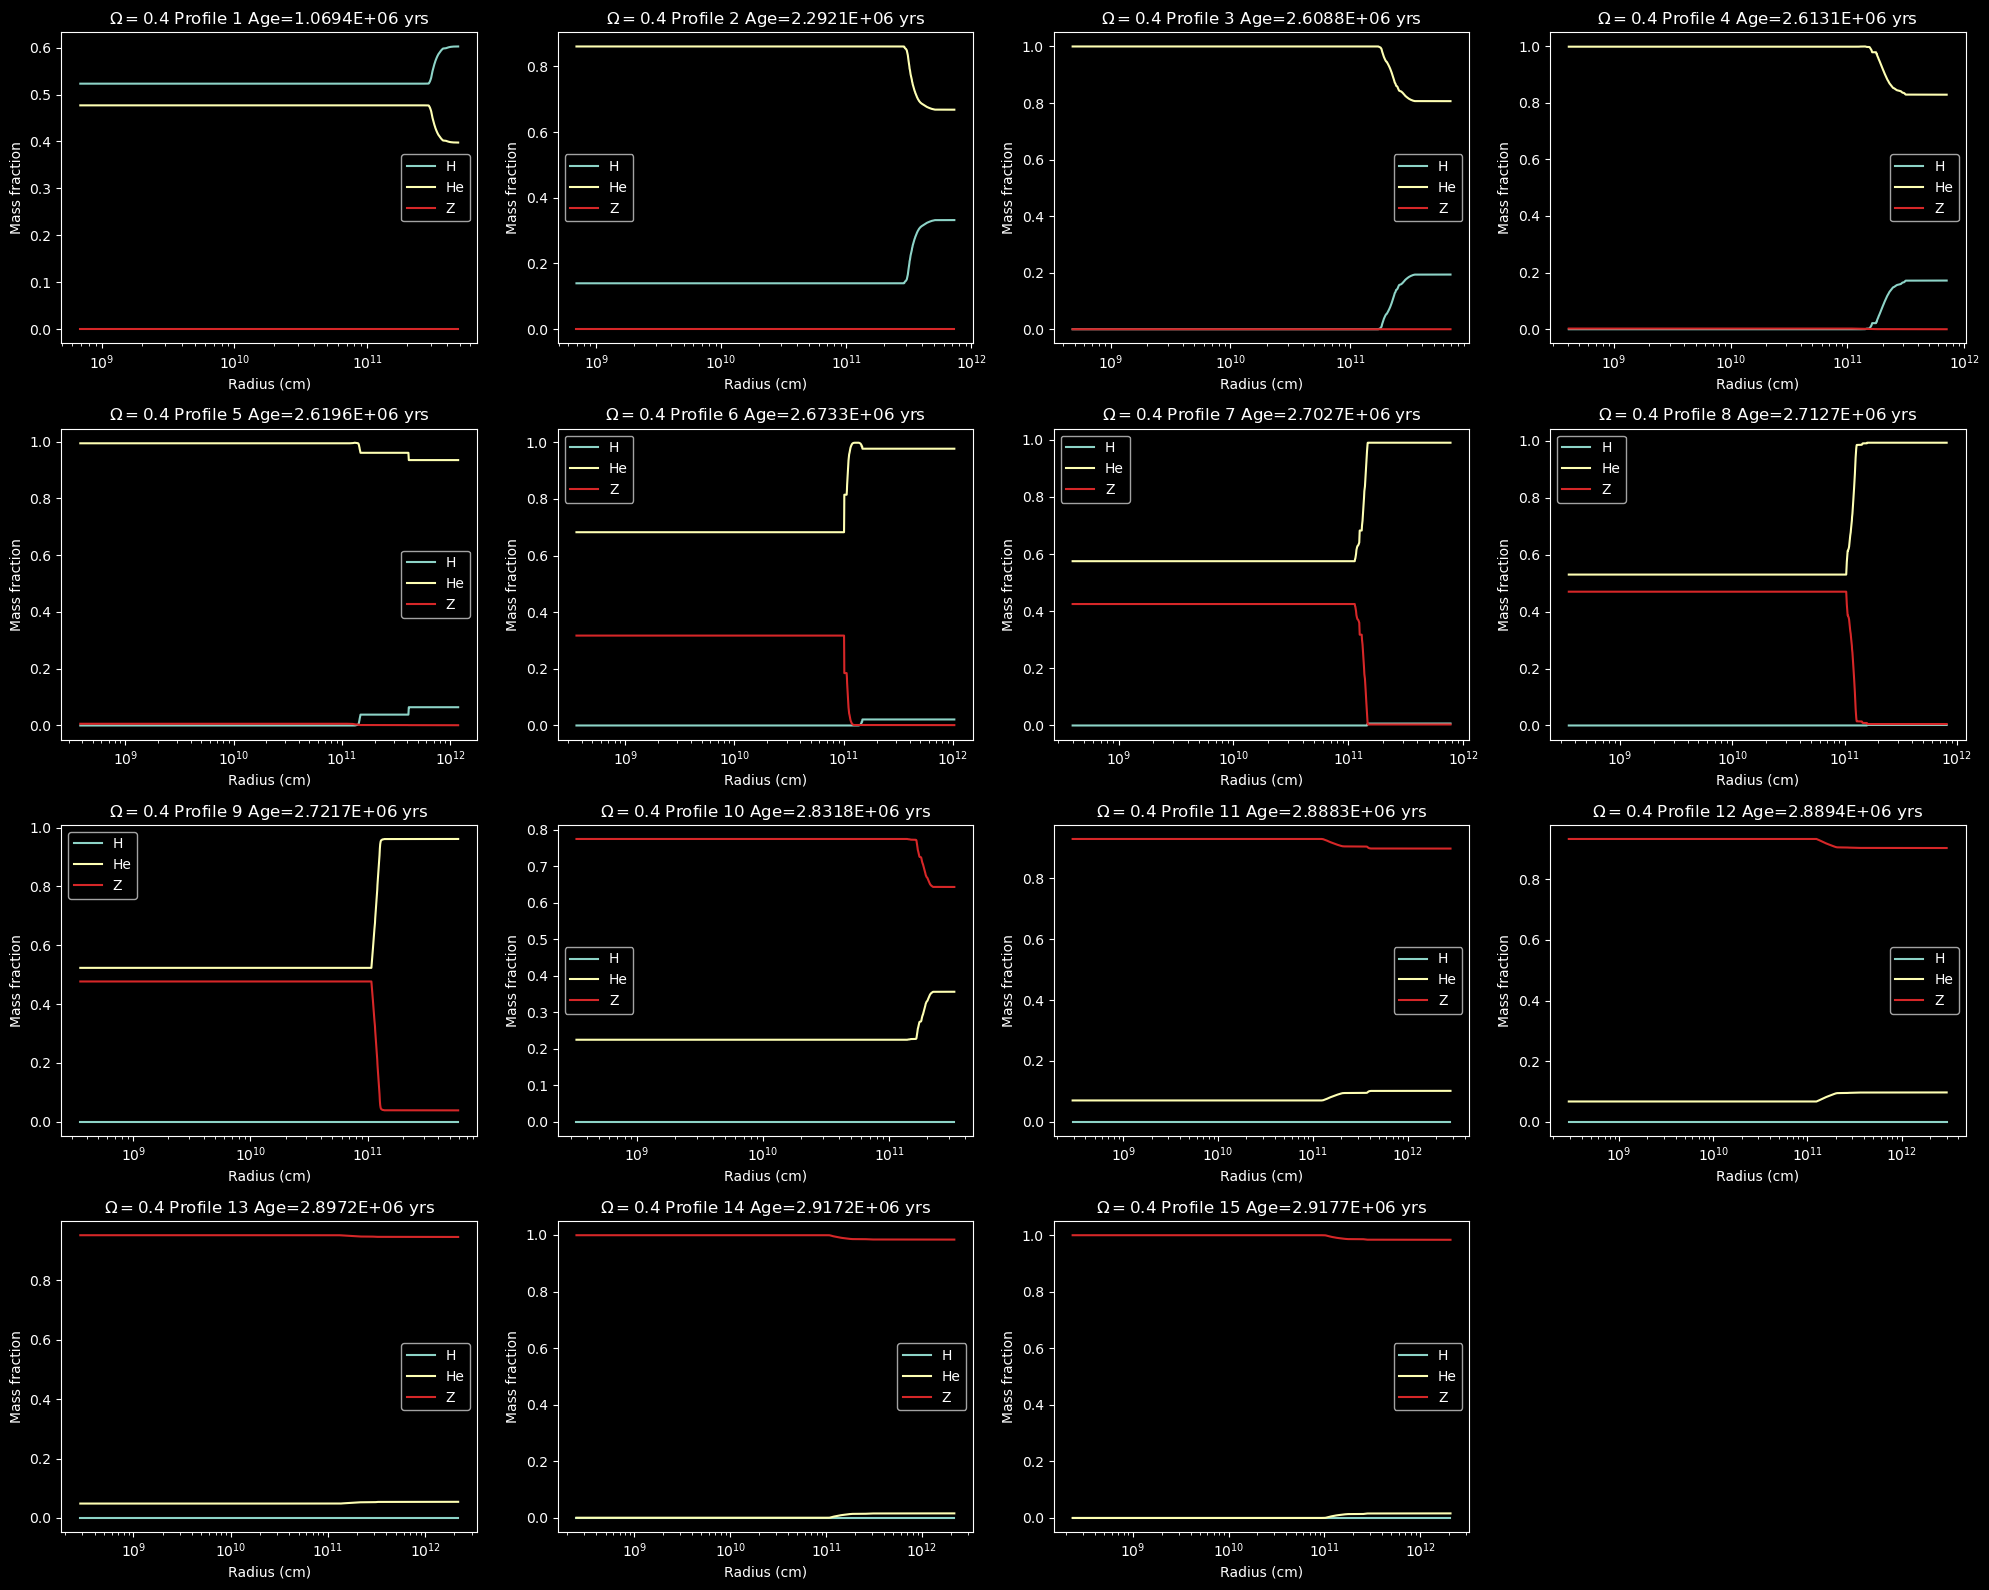

In [25]:
plot_mass_frac(prof_04, r'$\Omega=0.4$')

In [26]:
path_00 = '/home/elwo3899/25M_Study/SAVED_LOGS/LOGS_ROT_0.0_He/'
prof_00 =  [m.MesaData(file_name=f"{path_00}profile{i}.data") for i in range(1, 7)]

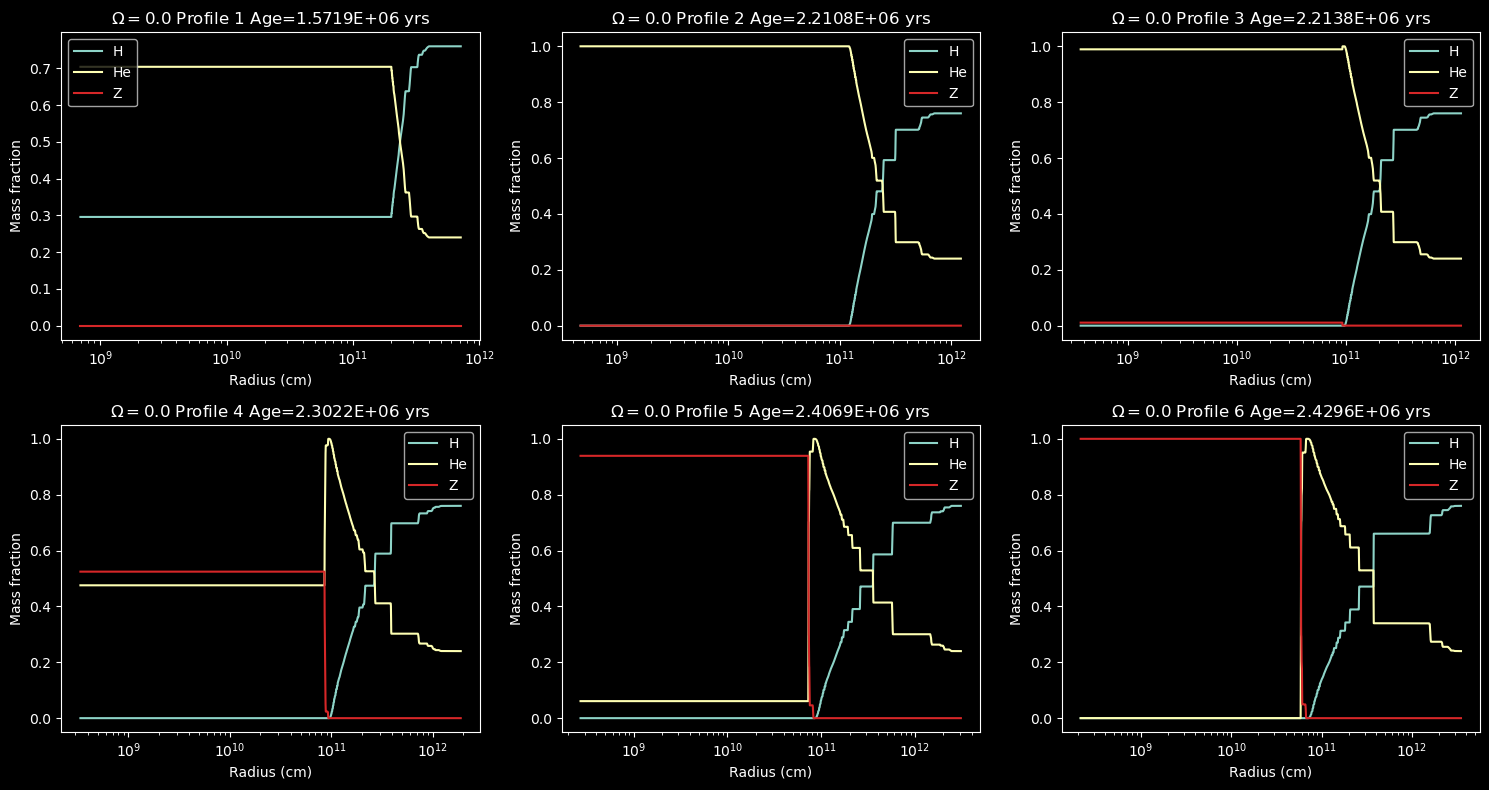

In [27]:
plot_mass_frac(prof_00, r'$\Omega=0.0$')

In [28]:
prof_04[0].bulk_names

('zone',
 'mass',
 'logR',
 'logT',
 'logRho',
 'logP',
 'x_mass_fraction_H',
 'y_mass_fraction_He',
 'z_mass_fraction_metals',
 'dm',
 'logdq',
 'dq_ratio',
 'q',
 'vel_km_per_s',
 'radius',
 'radius_cm',
 'logR_cm',
 'rmid',
 'velocity',
 'v_div_r',
 'pressure_scale_height',
 'mmid',
 'logxq',
 'dr',
 'log_dr',
 'dr_div_cs',
 'log_dr_div_cs',
 'acoustic_depth',
 'log_cell_collapse_time',
 'temperature',
 'energy',
 'logE',
 'rho',
 'entropy',
 'pressure',
 'logPgas',
 'pgas_div_ptotal',
 'eta',
 'mu',
 'grada',
 'gamma1',
 'free_e',
 'csound',
 'log_csound',
 'v_div_csound',
 'eps_grav',
 'eps_nuc',
 'non_nuc_neu',
 'pp',
 'cno',
 'tri_alpha',
 'c_alpha',
 'n_alpha',
 'o_alpha',
 'ne_alpha',
 'na_alpha',
 'mg_alpha',
 'si_alpha',
 's_alpha',
 'ar_alpha',
 'ca_alpha',
 'ti_alpha',
 'cr_alpha',
 'fe_co_ni',
 'c12_c12',
 'c12_o16',
 'o16_o16',
 'pnhe4',
 'photo',
 'ni56_co56',
 'co56_fe56',
 'other',
 'abar',
 'zbar',
 'z2bar',
 'ye',
 'x',
 'y',
 'z',
 'log_z',
 'neut',
 'h1',
 'prot',

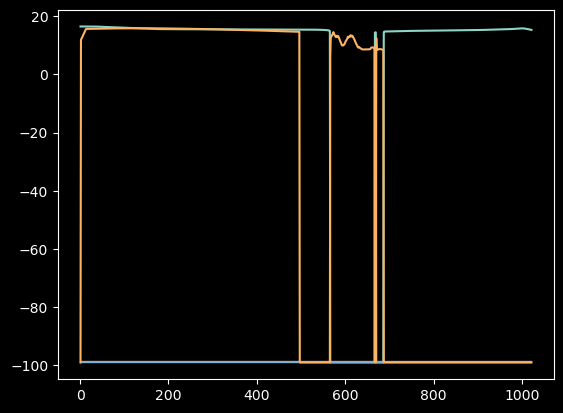

In [29]:
plt.plot(prof_04[7].zone, prof_04[7].log_D_conv)
plt.plot(prof_04[7].zone, prof_04[7].log_D_semi)
plt.plot(prof_04[7].zone, prof_04[7].log_D_thrm)
plt.plot(prof_04[7].zone, prof_04[7].log_D_minimum)
plt.plot(prof_04[7].zone, prof_04[7].log_D_rayleigh_taylor)
plt.plot(prof_04[7].zone, prof_04[7].log_D_omega)

In [30]:
def plot_with_threshold(ax, x_data, y_data, label, threshold=0):
    """Plots data with a label only if y_data has meaningful values."""
    if max(y_data) > threshold:
        ax.plot(x_data, y_data, label=label, linewidth=3)
    else:
        ax.plot(x_data, y_data, linewidth=3)

In [31]:
def mix_types_helper(ax, data, group_name, i, prof_num = None):
    """Plots Multiple Lines on a Single Plot For each profile in a list, Specifically built for Mixing Types"""
    plot_with_threshold(ax[i], data.zone, data.log_D_conv, 'Convection')
    plot_with_threshold(ax[i], data.zone, data.log_D_semi, 'Semiconvection')
    plot_with_threshold(ax[i], data.zone, data.log_D_thrm, 'Thermohaline')
    plot_with_threshold(ax[i], data.zone, data.log_D_minimum, 'Minimum')
    plot_with_threshold(ax[i], data.zone, data.log_D_rayleigh_taylor, 'Rayleigh_Taylor')
    plot_with_threshold(ax[i], data.zone, data.log_D_omega, 'Rotation')
    if prof_num == None:
        ax[i].set(xlabel=r'Zones', ylabel=r'Log D $cm^2$ $s^-1$', 
                  title=f'{group_name} Profile {i+1} Age={data.star_age:.4E} yrs',
                  ylim=(0,20))
    else:
        ax[i].set(xlabel=r'Zones', ylabel=r'Log D $cm^2$ $s^-1$', 
                  title=f'{group_name} Profile {prof_num} Age={data.star_age:.4E} yrs', 
                  ylim=(0,20))
    ax[i].legend()

In [32]:
import math
def plot_mix_types(prof_list, group_name=None):
    prof_len = len(prof_list)
    cols = math.ceil(math.sqrt(prof_len))
    rows = math.ceil(prof_len / cols)
    
    fig, ax = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), tight_layout=True)
    
    fax = ax.ravel() if isinstance(ax, np.ndarray) else [ax]
    
    
    for i, data in enumerate(prof_list):
        mix_types_helper(fax, data, group_name, i)
    # Turn off any unused subplots
    for j in range(prof_len, len(fax)):
        fax[j].axis('off')  # Hide empty subplots
    plt.show()

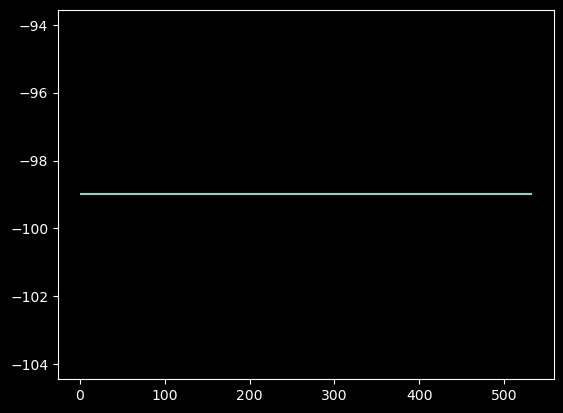

In [33]:
if not all(v == 0 for v in prof_04[0].log_D_minimum):
    plt.plot(prof_04[0].zone, prof_04[0].log_D_minimum)

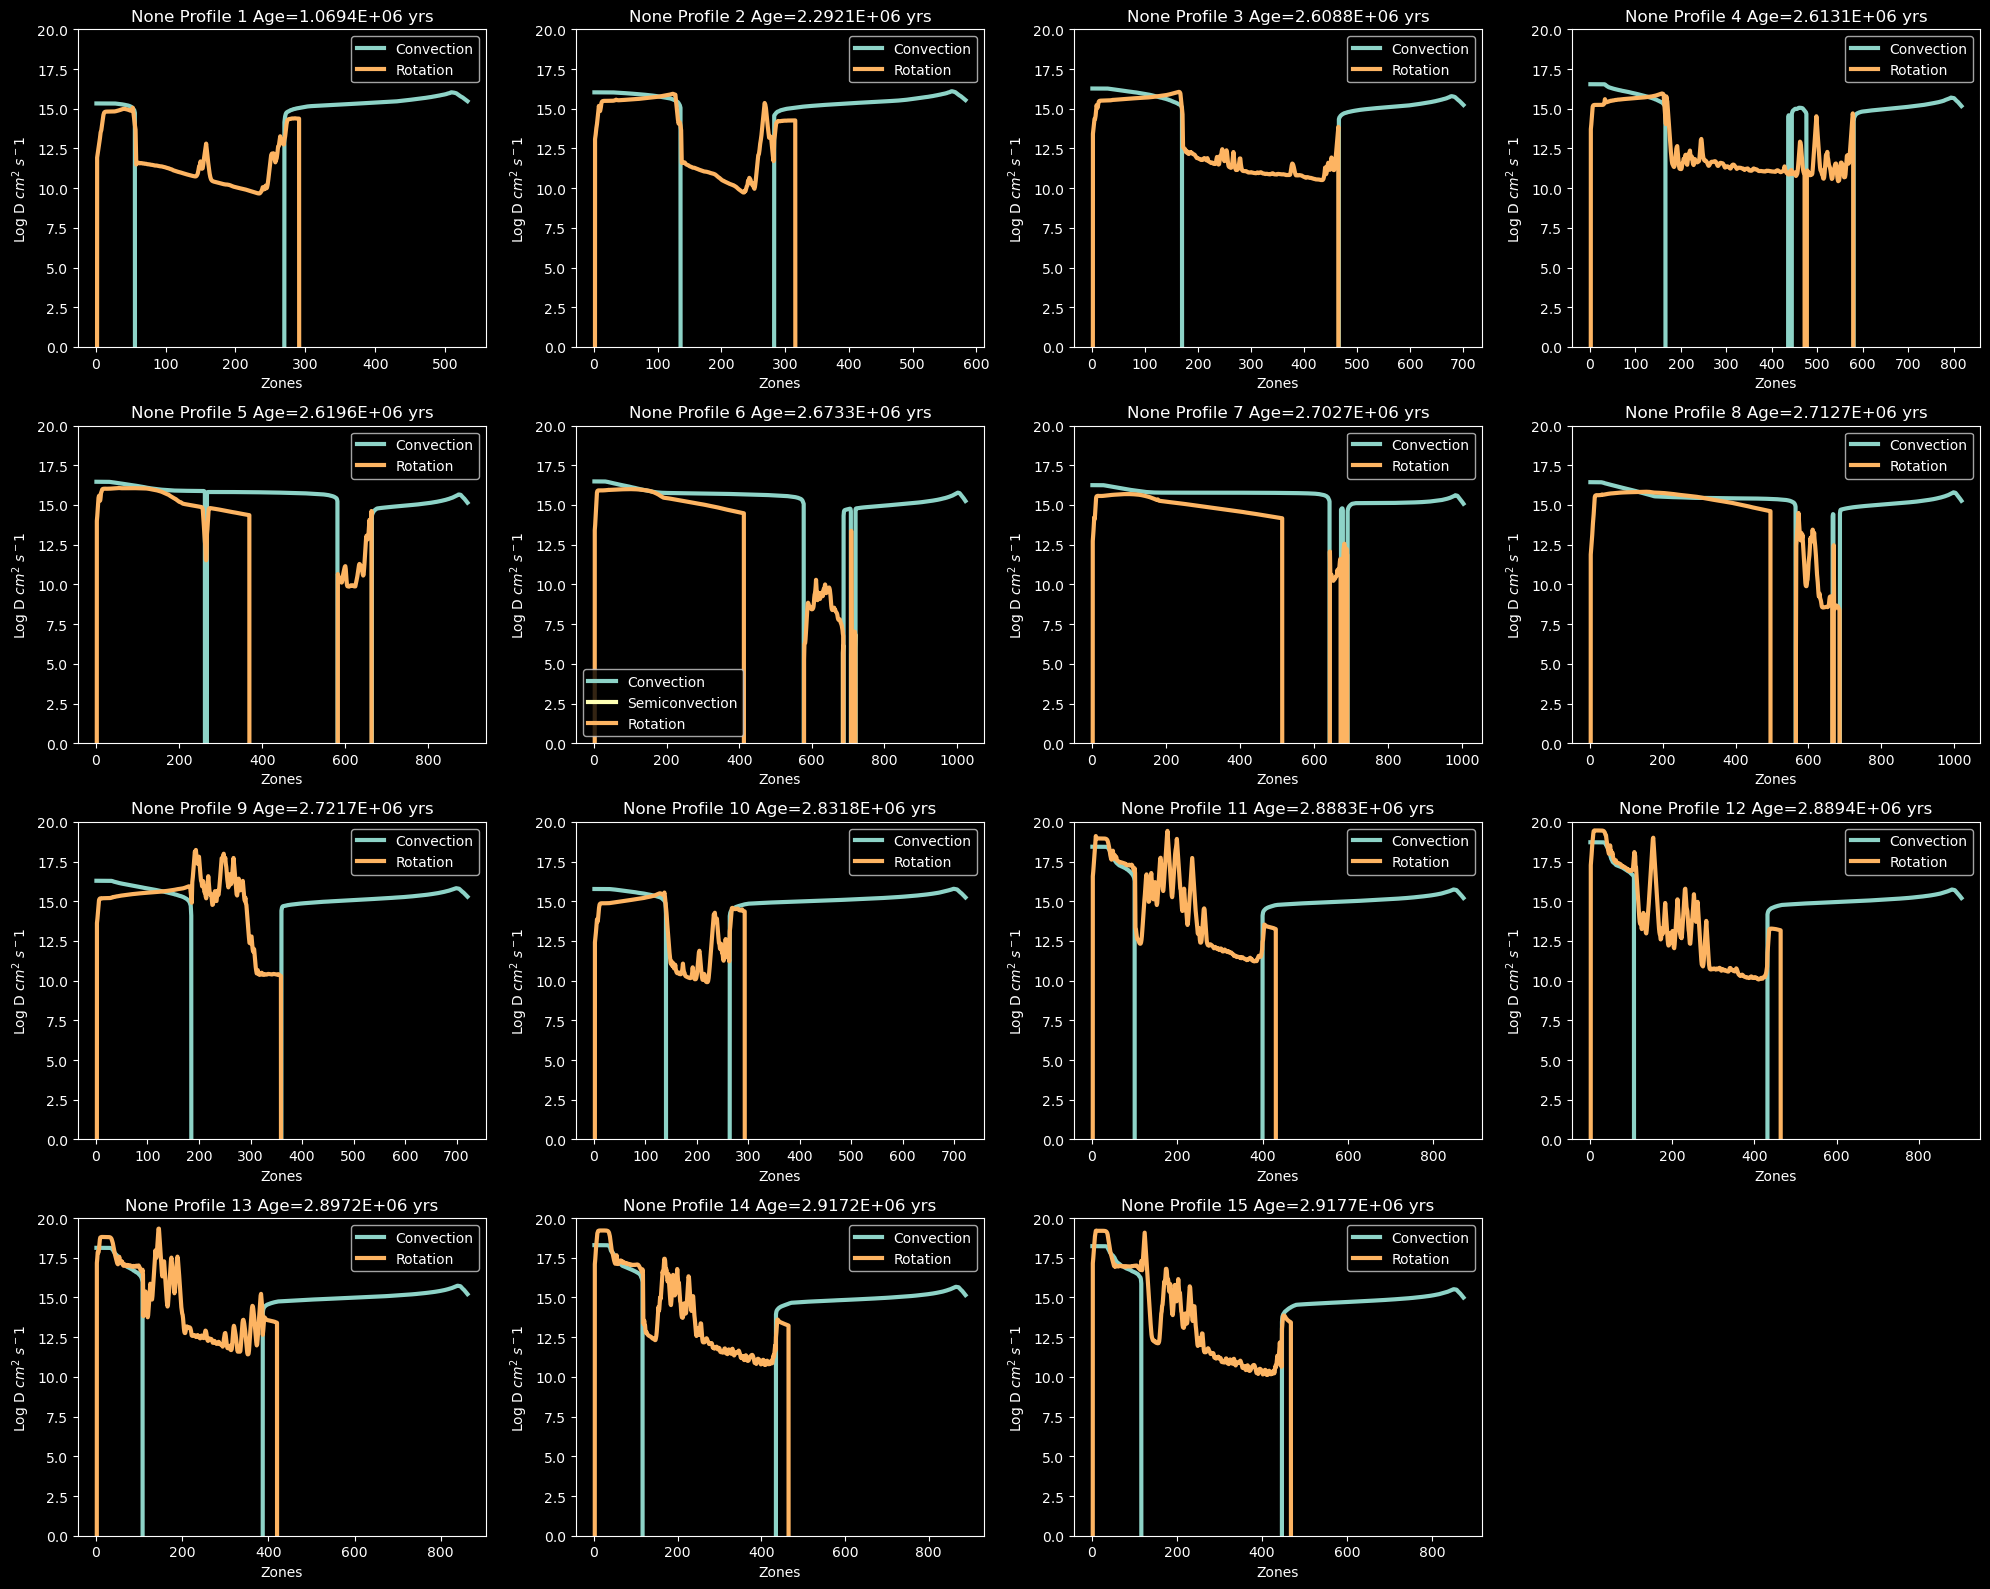

In [34]:
plot_mix_types(prof_04)

In [35]:
def mix_types_helper_rad(ax, data, group_name, i, prof_num = None):
    """Plots Multiple Lines on a Single Plot For each profile in a list, Specifically built for Mixing Types"""
    plot_with_threshold(ax[i], data.radius, data.log_D_conv, 'Convection')
    plot_with_threshold(ax[i], data.radius, data.log_D_semi, 'Semiconvection')
    plot_with_threshold(ax[i], data.radius, data.log_D_thrm, 'Thermohaline')
    plot_with_threshold(ax[i], data.radius, data.log_D_minimum, 'Minimum')
    plot_with_threshold(ax[i], data.radius, data.log_D_rayleigh_taylor, 'Rayleigh_Taylor')
    plot_with_threshold(ax[i], data.radius, data.log_D_omega, 'Rotation')
    if prof_num == None:
        ax[i].set(xlabel=r'Radius ($R_\odot$)', ylabel=r'Log D $cm^2$ $s^-1$', 
                  title=f'{group_name} Profile {i+1} Age={data.star_age:.4E} yrs',
                  ylim=(0,20))
    else:
        ax[i].set(xlabel=r'Radius ($R_\odot$)', ylabel=r'Log D $cm^2$ $s^-1$', 
                  title=f'{group_name} Profile {prof_num} Age={data.star_age:.4E} yrs', 
                  ylim=(0,20))
    ax[i].legend()

In [36]:
def plot_mix_types_rad(prof_list, group_name=None):
    prof_len = len(prof_list)
    cols = math.ceil(math.sqrt(prof_len))
    rows = math.ceil(prof_len / cols)
    
    fig, ax = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), tight_layout=True)
    
    fax = ax.ravel() if isinstance(ax, np.ndarray) else [ax]
    
    
    for i, data in enumerate(prof_list):
        mix_types_helper_rad(fax, data, group_name, i)
    # Turn off any unused subplots
    for j in range(prof_len, len(fax)):
        fax[j].axis('off')  # Hide empty subplots
    plt.show()

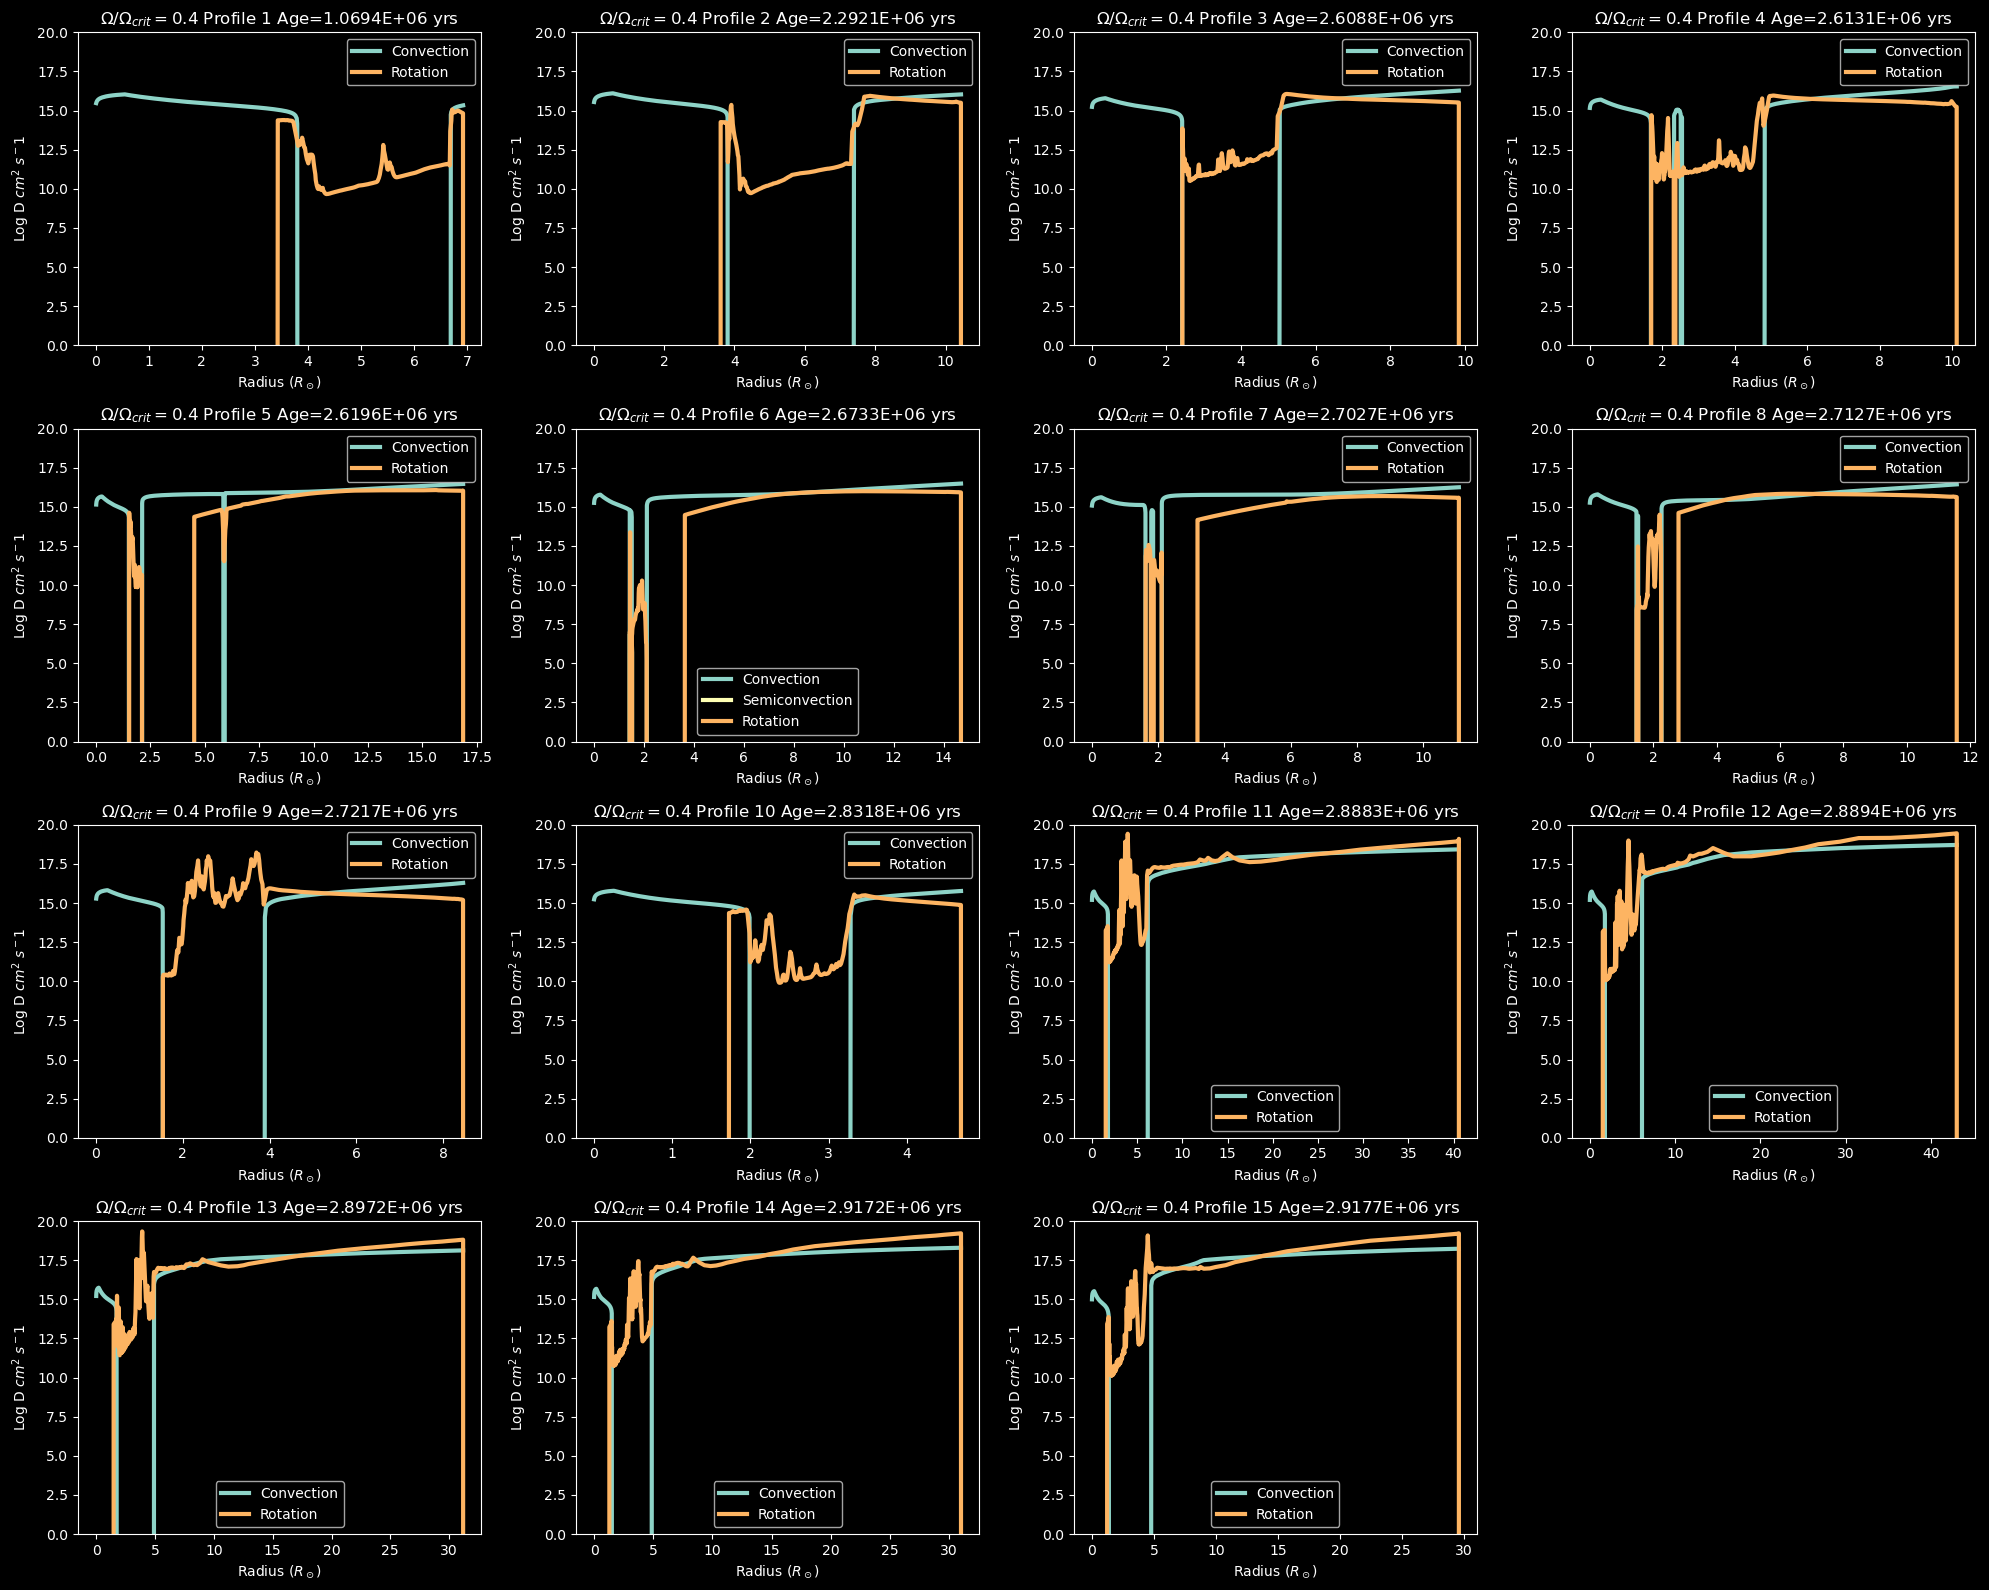

In [107]:
plot_mix_types_rad(prof_04, r'$\Omega/\Omega_{crit} = 0.4$')

In [ ]:
path_05 = '/home/elwo3899/25M_Study/ASTR3400/LOGS_ROT_0.5/'
prof_05 =  [m.MesaData(file_name=f"{path_05}profile{i}.data") for i in range(1, 31)]

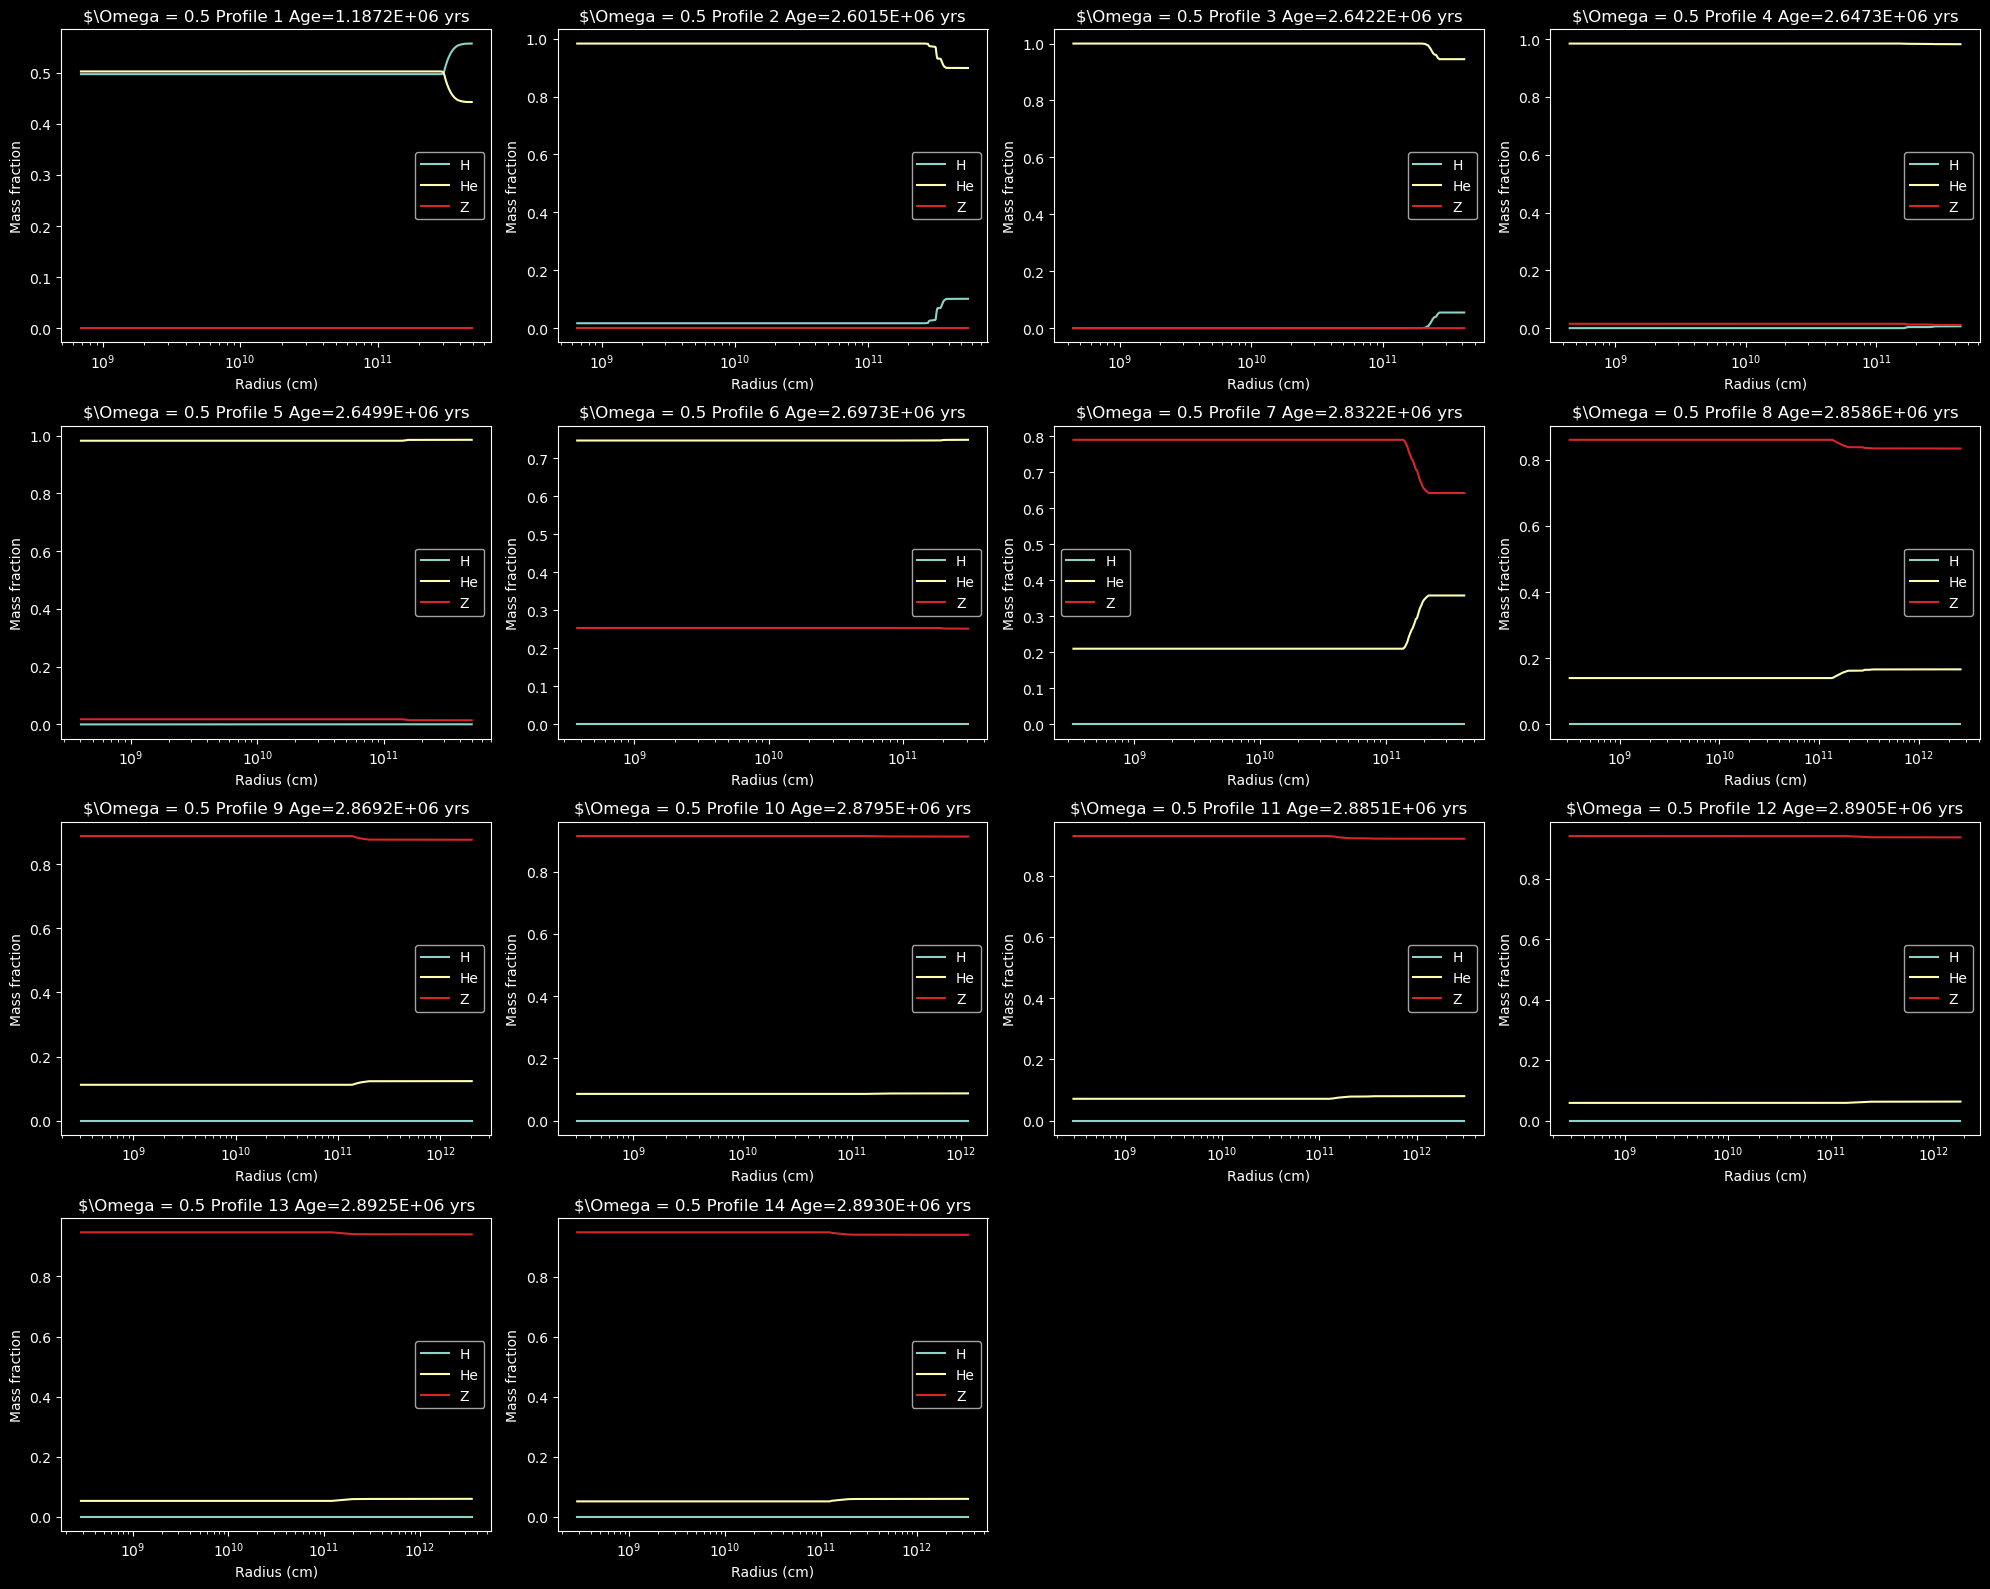

In [39]:
plot_mass_frac(prof_05[0:14], r'$\Omega = 0.5')

In [40]:
def semilogx_with_threshold(ax, x_data, y_data, label, threshold=0):
    """Plots data with a label only if y_data has meaningful values."""
    if max(y_data) > threshold:
        ax.semilogx(x_data, y_data, label=label, linewidth=2)
    else:
        ax.semilogx(x_data, y_data, linewidth=2)

def plot_mFracs_for_profile_det(ax, data, group_name, i, prof_num = None):
    plot_with_threshold(ax[i], data.radius, data.log_h1, label='h1', threshold=-6)
    plot_with_threshold(ax[i], data.radius, data.log_he3, label='he3', threshold=-6.)
    plot_with_threshold(ax[i], data.radius, data.log_he4, label='he4', threshold=-6.)
    plot_with_threshold(ax[i], data.radius, data.log_c12, label='c12', threshold=-6.)
    plot_with_threshold(ax[i], data.radius, data.log_n14, label='n14', threshold=-6.)
    plot_with_threshold(ax[i], data.radius, data.log_o16, label='o16', threshold=-6.)
    plot_with_threshold(ax[i], data.radius, data.log_ne20, label='ne20', threshold=-6.)
    plot_with_threshold(ax[i], data.radius, data.log_mg24, label='mg24', threshold=-6.)
    plot_with_threshold(ax[i], data.radius, data.log_si28, label='si28', threshold=-6.)
    if prof_num == None:
        ax[i].set(xlabel=r'radius ($R_\odot$)', ylabel='Log Mass fraction', 
                  title=f'{group_name} Profile {i+1} Age={data.star_age:.4E} yrs',
                  ylim=(-6,0.5))
    else:
        ax[i].set(xlabel=r'radius ($R_\odot$)', ylabel='Log Mass fraction', 
                  title=f'{group_name} Profile {prof_num} Age={data.star_age:.4E} yrs',
                  ylim=(-6,0.5))
    ax[i].legend()


def plot_mass_frac_det(prof_list, group_name=None):
    prof_len = len(prof_list)
    cols = math.ceil(math.sqrt(prof_len))
    rows = math.ceil(prof_len / cols)
    
    fig, ax = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), tight_layout=True)
    
    fax = ax.ravel() if isinstance(ax, np.ndarray) else [ax]
    
    
    for i, data in enumerate(prof_list):
        plot_mFracs_for_profile_det(fax, data, group_name, i)
    # Turn off any unused subplots
    for j in range(prof_len, len(fax)):
        fax[j].axis('off')  # Hide empty subplots
    plt.show()

In [83]:
def plot_mFracs_for_profile_det_logx(ax, data, group_name, i, prof_num = None):
    semilogx_with_threshold(ax[i], data.radius, data.log_h1, label='h1', threshold=-6)
    semilogx_with_threshold(ax[i], data.radius, data.log_he3, label='he3', threshold=-6.)
    semilogx_with_threshold(ax[i], data.radius, data.log_he4, label='he4', threshold=-6.)
    semilogx_with_threshold(ax[i], data.radius, data.log_c12, label='c12', threshold=-6.)
    semilogx_with_threshold(ax[i], data.radius, data.log_n14, label='n14', threshold=-6.)
    semilogx_with_threshold(ax[i], data.radius, data.log_o16, label='o16', threshold=-6.)
    semilogx_with_threshold(ax[i], data.radius, data.log_ne20, label='ne20', threshold=-6.)
    semilogx_with_threshold(ax[i], data.radius, data.log_mg24, label='mg24', threshold=-6.)
    semilogx_with_threshold(ax[i], data.radius, data.log_si28, label='si28', threshold=-6.)
    if prof_num == None:
        ax[i].set(xlabel=r'radius ($R_\odot$)', ylabel='Log Mass fraction', 
                  title=f'{group_name} Profile {i+1} Age={data.star_age:.4E} yrs',
                  ylim=(-6,0.5))
    else:
        ax[i].set(xlabel=r'radius ($R_\odot$)', ylabel='Log Mass fraction', 
                  title=f'{group_name} Profile {prof_num} Age={data.star_age:.4E} yrs',
                  ylim=(-6,0.5))
    ax[i].legend()


def plot_mass_frac_det_logx(prof_list, group_name=None):
    prof_len = len(prof_list)
    cols = math.ceil(math.sqrt(prof_len))
    rows = math.ceil(prof_len / cols)
    
    fig, ax = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), tight_layout=True)
    
    fax = ax.ravel() if isinstance(ax, np.ndarray) else [ax]
    
    
    for i, data in enumerate(prof_list):
        plot_mFracs_for_profile_det_logx(fax, data, group_name, i)
    # Turn off any unused subplots
    for j in range(prof_len, len(fax)):
        fax[j].axis('off')  # Hide empty subplots
    plt.show()

In [41]:
len(prof_05)

30

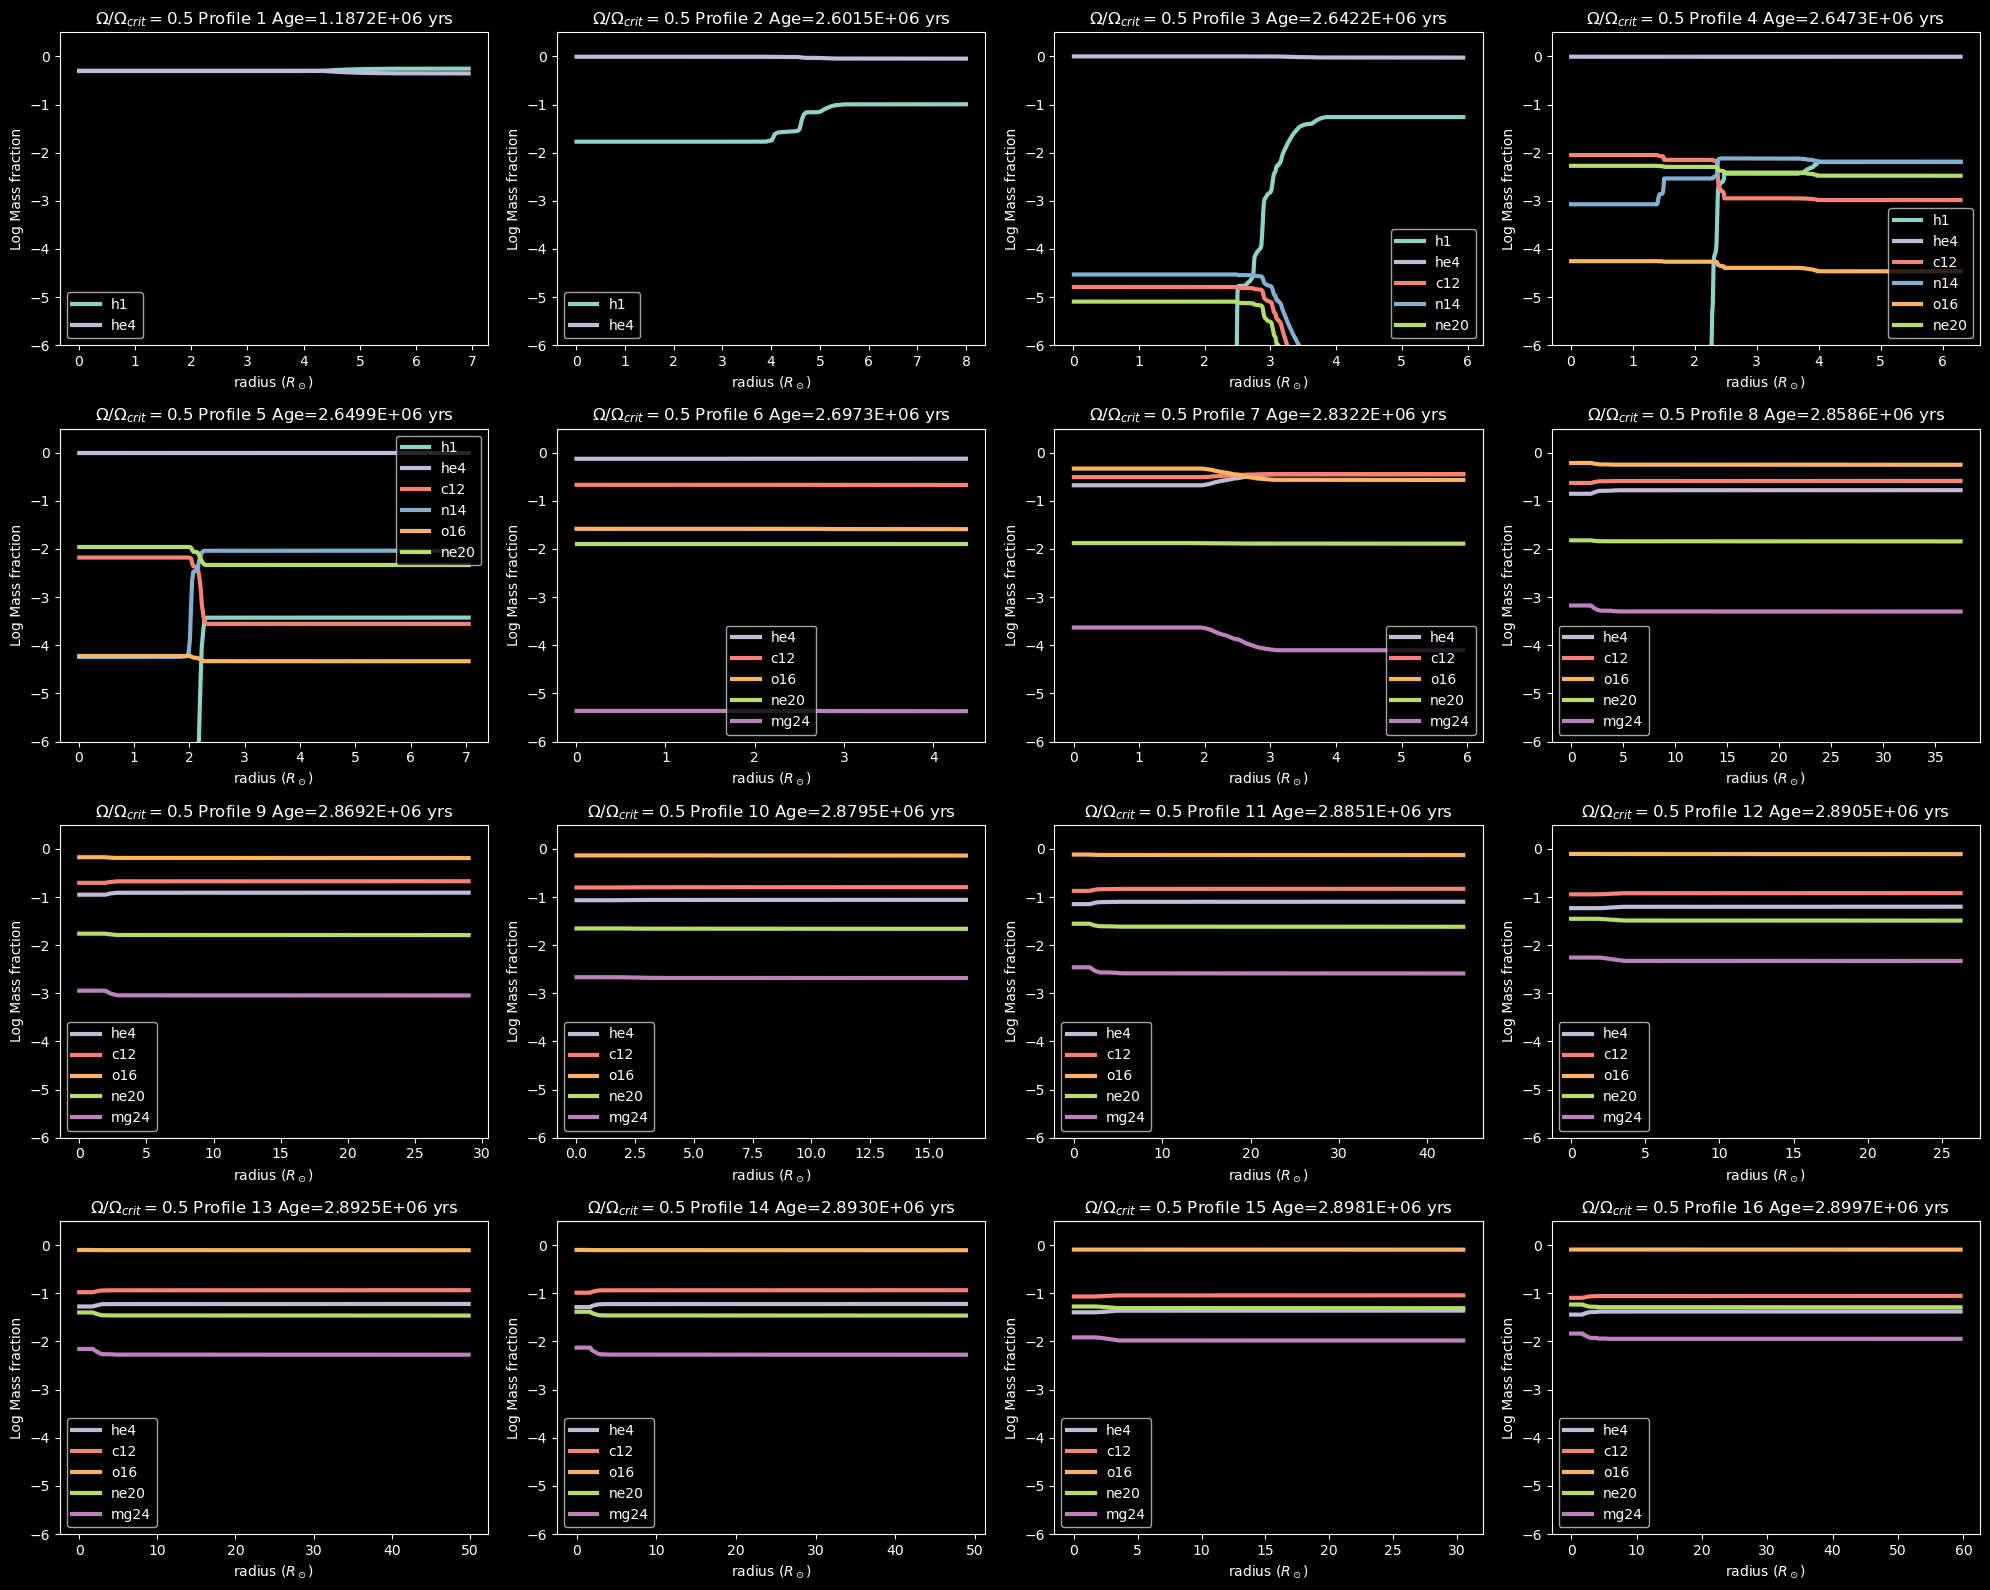

In [96]:
plot_mass_frac_det(prof_05[0:16], group_name=r'$\Omega/\Omega_{crit}=0.5$')

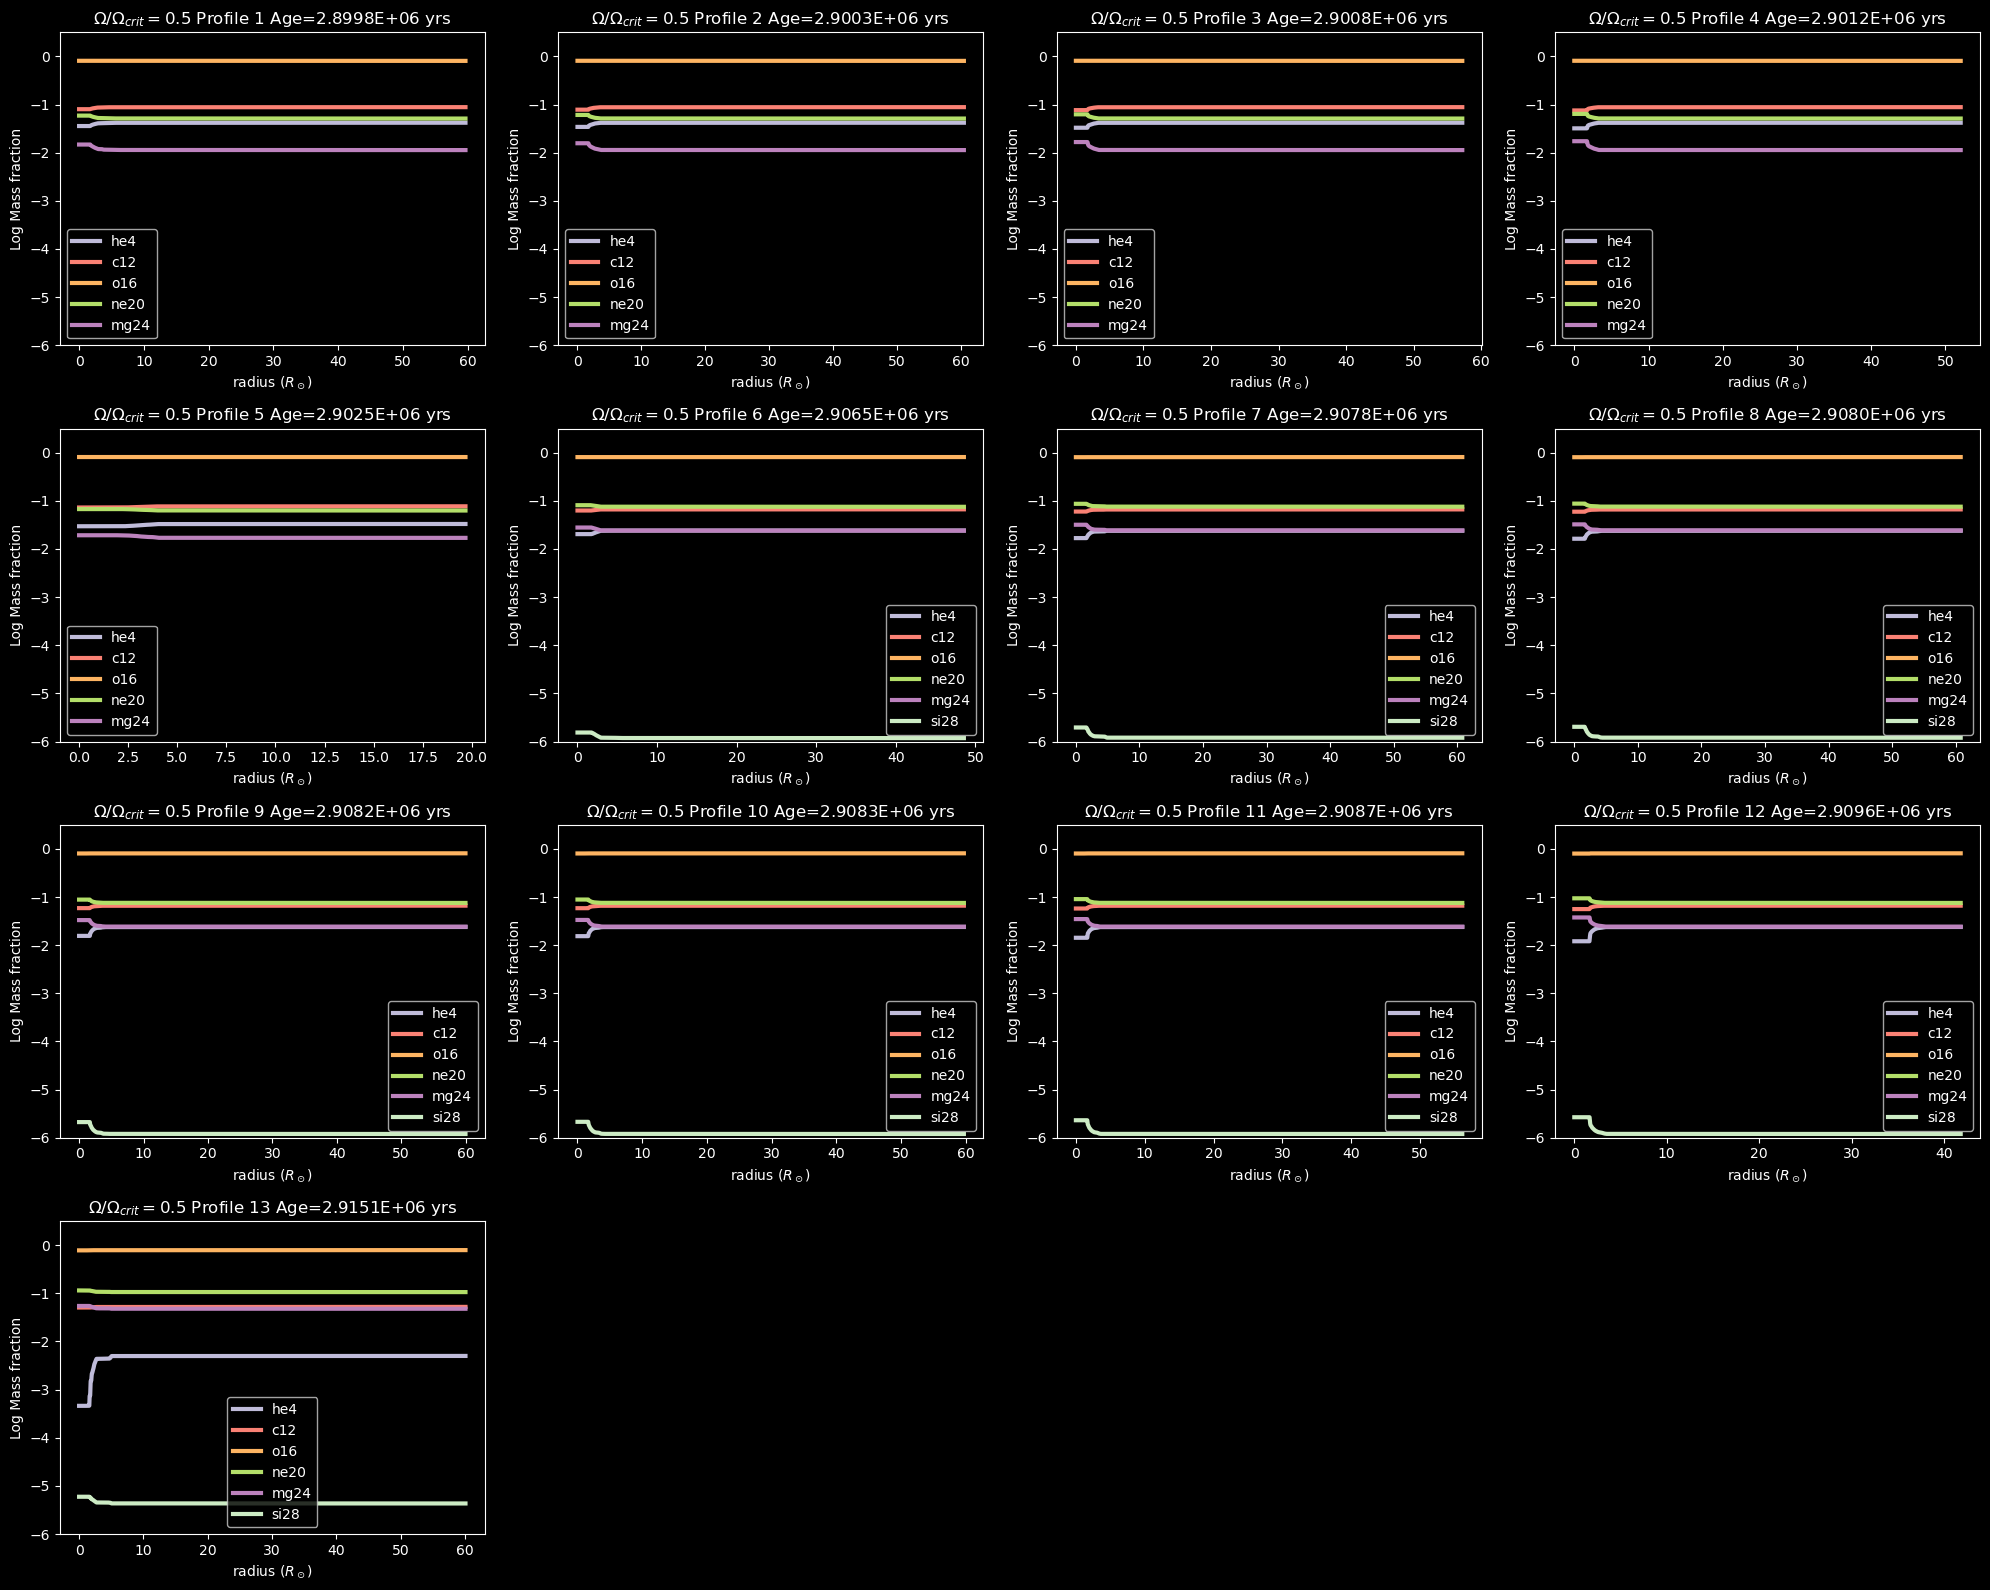

In [95]:
plot_mass_frac_det(prof_05[16:29], group_name=r'$\Omega/\Omega_{crit}=0.5$')

In [48]:
prof_05[1].bulk_names

('zone',
 'mass',
 'logR',
 'logT',
 'logRho',
 'logP',
 'x_mass_fraction_H',
 'y_mass_fraction_He',
 'z_mass_fraction_metals',
 'dm',
 'logdq',
 'dq_ratio',
 'q',
 'vel_km_per_s',
 'radius',
 'radius_cm',
 'logR_cm',
 'rmid',
 'velocity',
 'v_div_r',
 'pressure_scale_height',
 'mmid',
 'logxq',
 'dr',
 'log_dr',
 'dr_div_cs',
 'log_dr_div_cs',
 'acoustic_depth',
 'log_cell_collapse_time',
 'temperature',
 'energy',
 'logE',
 'rho',
 'entropy',
 'pressure',
 'logPgas',
 'pgas_div_ptotal',
 'eta',
 'mu',
 'grada',
 'gamma1',
 'free_e',
 'csound',
 'log_csound',
 'v_div_csound',
 'eps_grav',
 'eps_nuc',
 'non_nuc_neu',
 'pp',
 'cno',
 'tri_alpha',
 'c_alpha',
 'n_alpha',
 'o_alpha',
 'ne_alpha',
 'na_alpha',
 'mg_alpha',
 'si_alpha',
 's_alpha',
 'ar_alpha',
 'ca_alpha',
 'ti_alpha',
 'cr_alpha',
 'fe_co_ni',
 'c12_c12',
 'c12_o16',
 'o16_o16',
 'pnhe4',
 'photo',
 'ni56_co56',
 'co56_fe56',
 'other',
 'abar',
 'zbar',
 'z2bar',
 'ye',
 'x',
 'y',
 'z',
 'log_z',
 'neut',
 'h1',
 'prot',

In [56]:
path_00alt = '/home/elwo3899/25M_Study/ASTR3400/LOGS_ROT_0.0/'
prof_00alt = [m.MesaData(file_name=f"{path_00alt}profile{i}.data") for i in range(1, 7)]

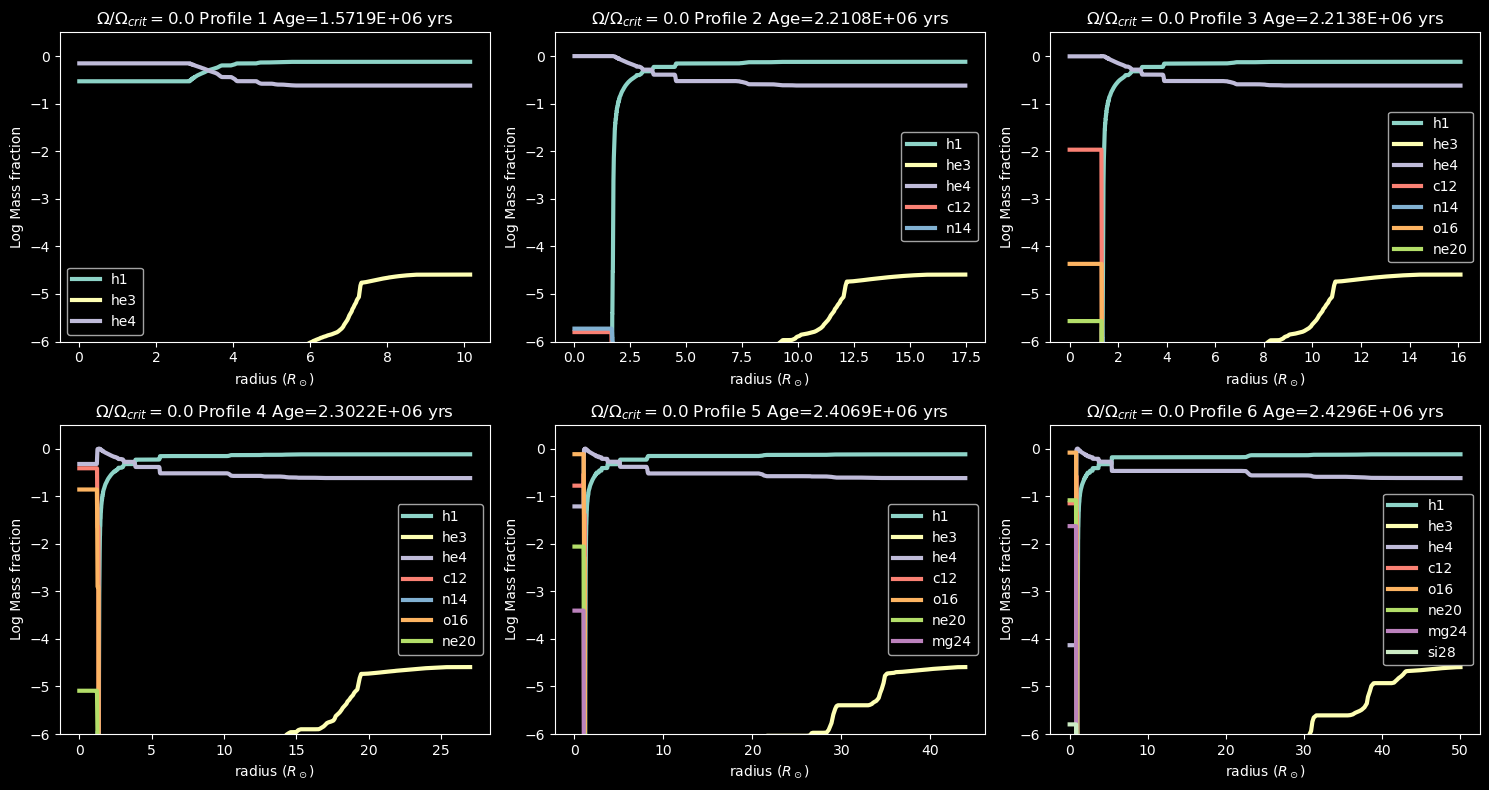

In [94]:
plot_mass_frac_det(prof_00, group_name=r'$\Omega/\Omega_{crit}=0.0$')

In [90]:
path_02 = '/home/elwo3899/25M_Study/ASTR3400/LOGS_ROT_0.2/'
path_03 = '/home/elwo3899/25M_Study/ASTR3400/LOGS_ROT_0.3/'
path_04alt = '/home/elwo3899/25M_Study/ASTR3400/LOGS_ROT_0.4/'
prof_02 = [m.MesaData(file_name=f"{path_02}profile{i}.data") for i in range(1, 12)]
prof_03 = [m.MesaData(file_name=f"{path_03}profile{i}.data") for i in range(1, 13)]
prof_04alt = [m.MesaData(file_name=f"{path_04alt}profile{i}.data") for i in range(1, 14)]

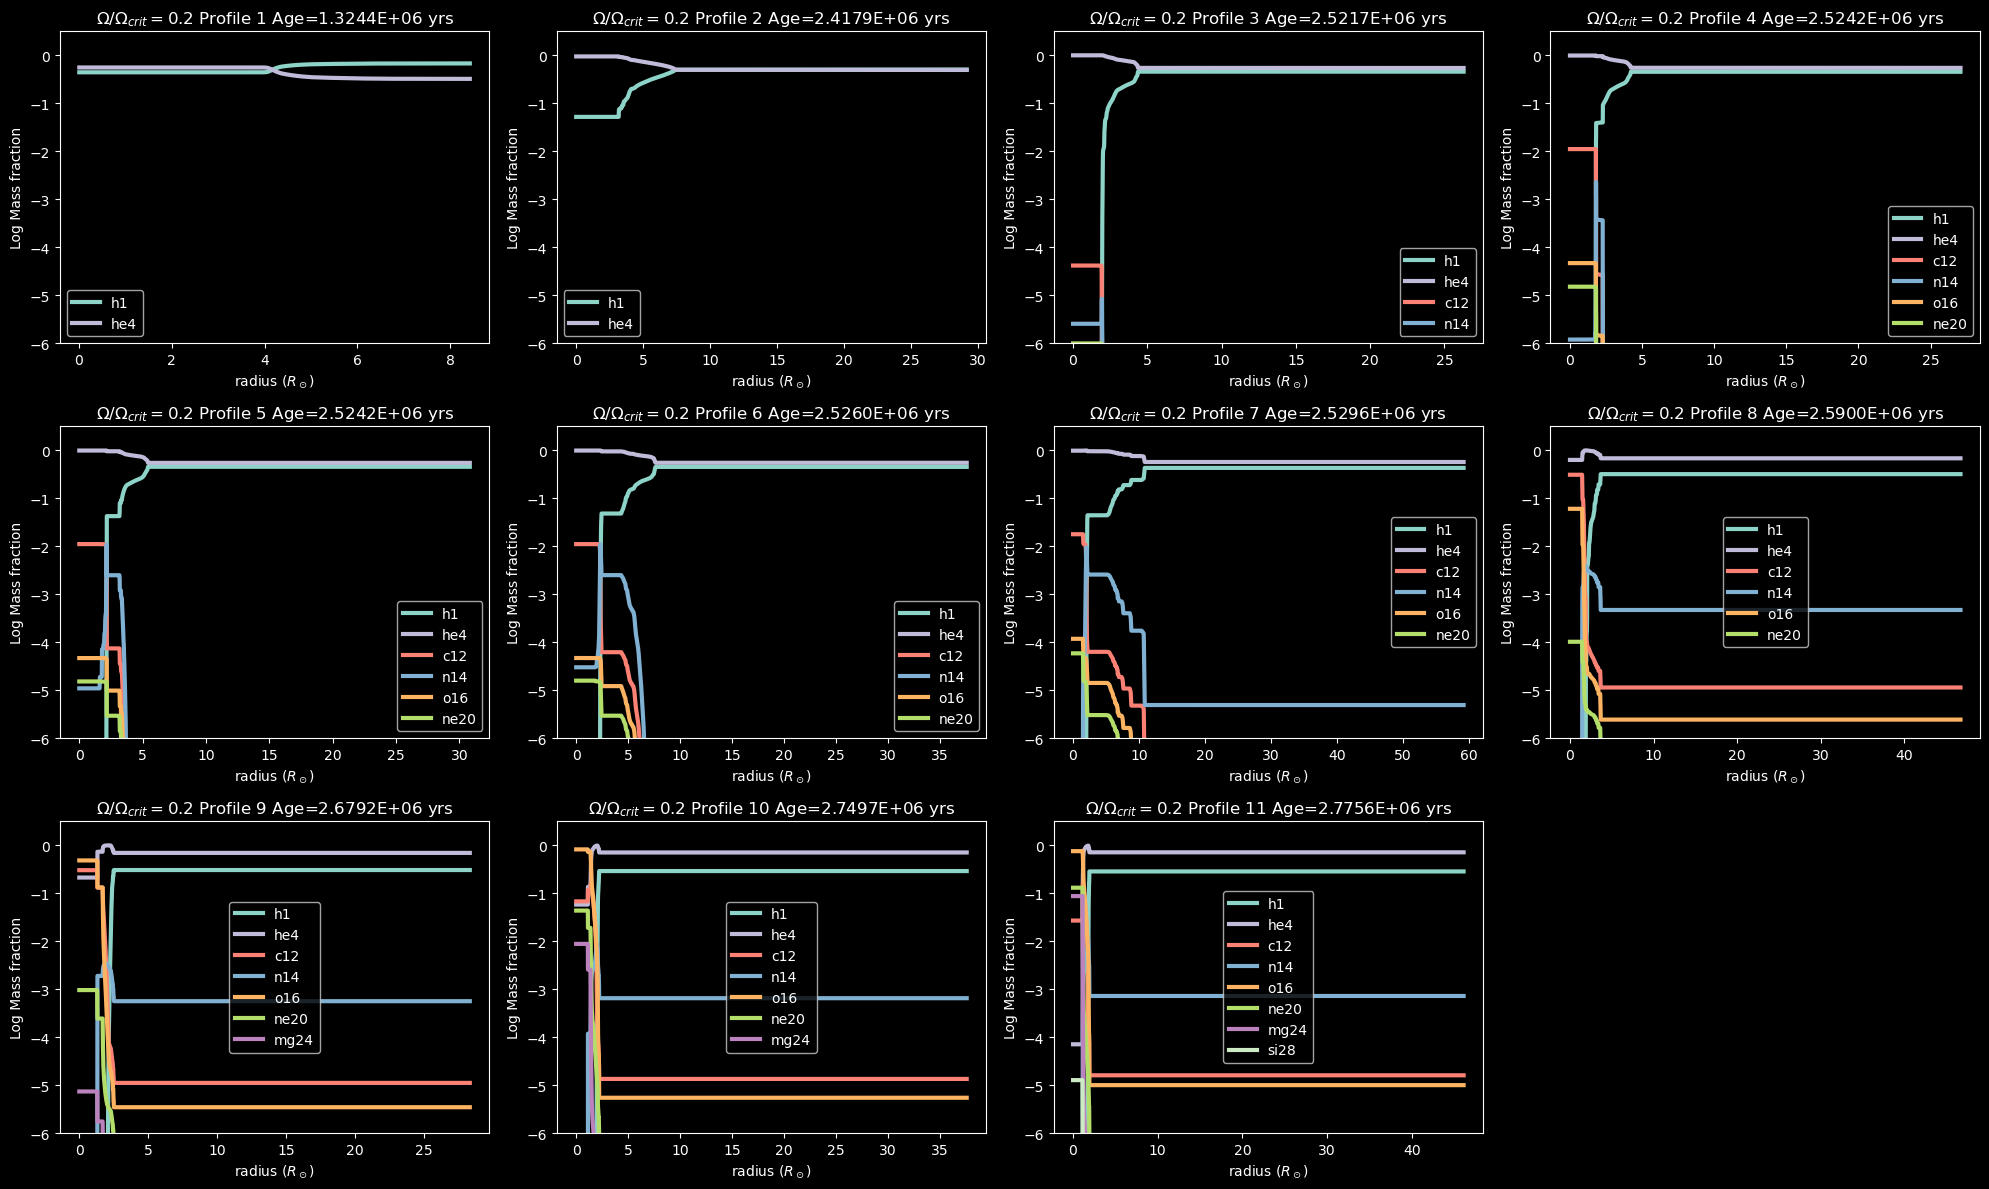

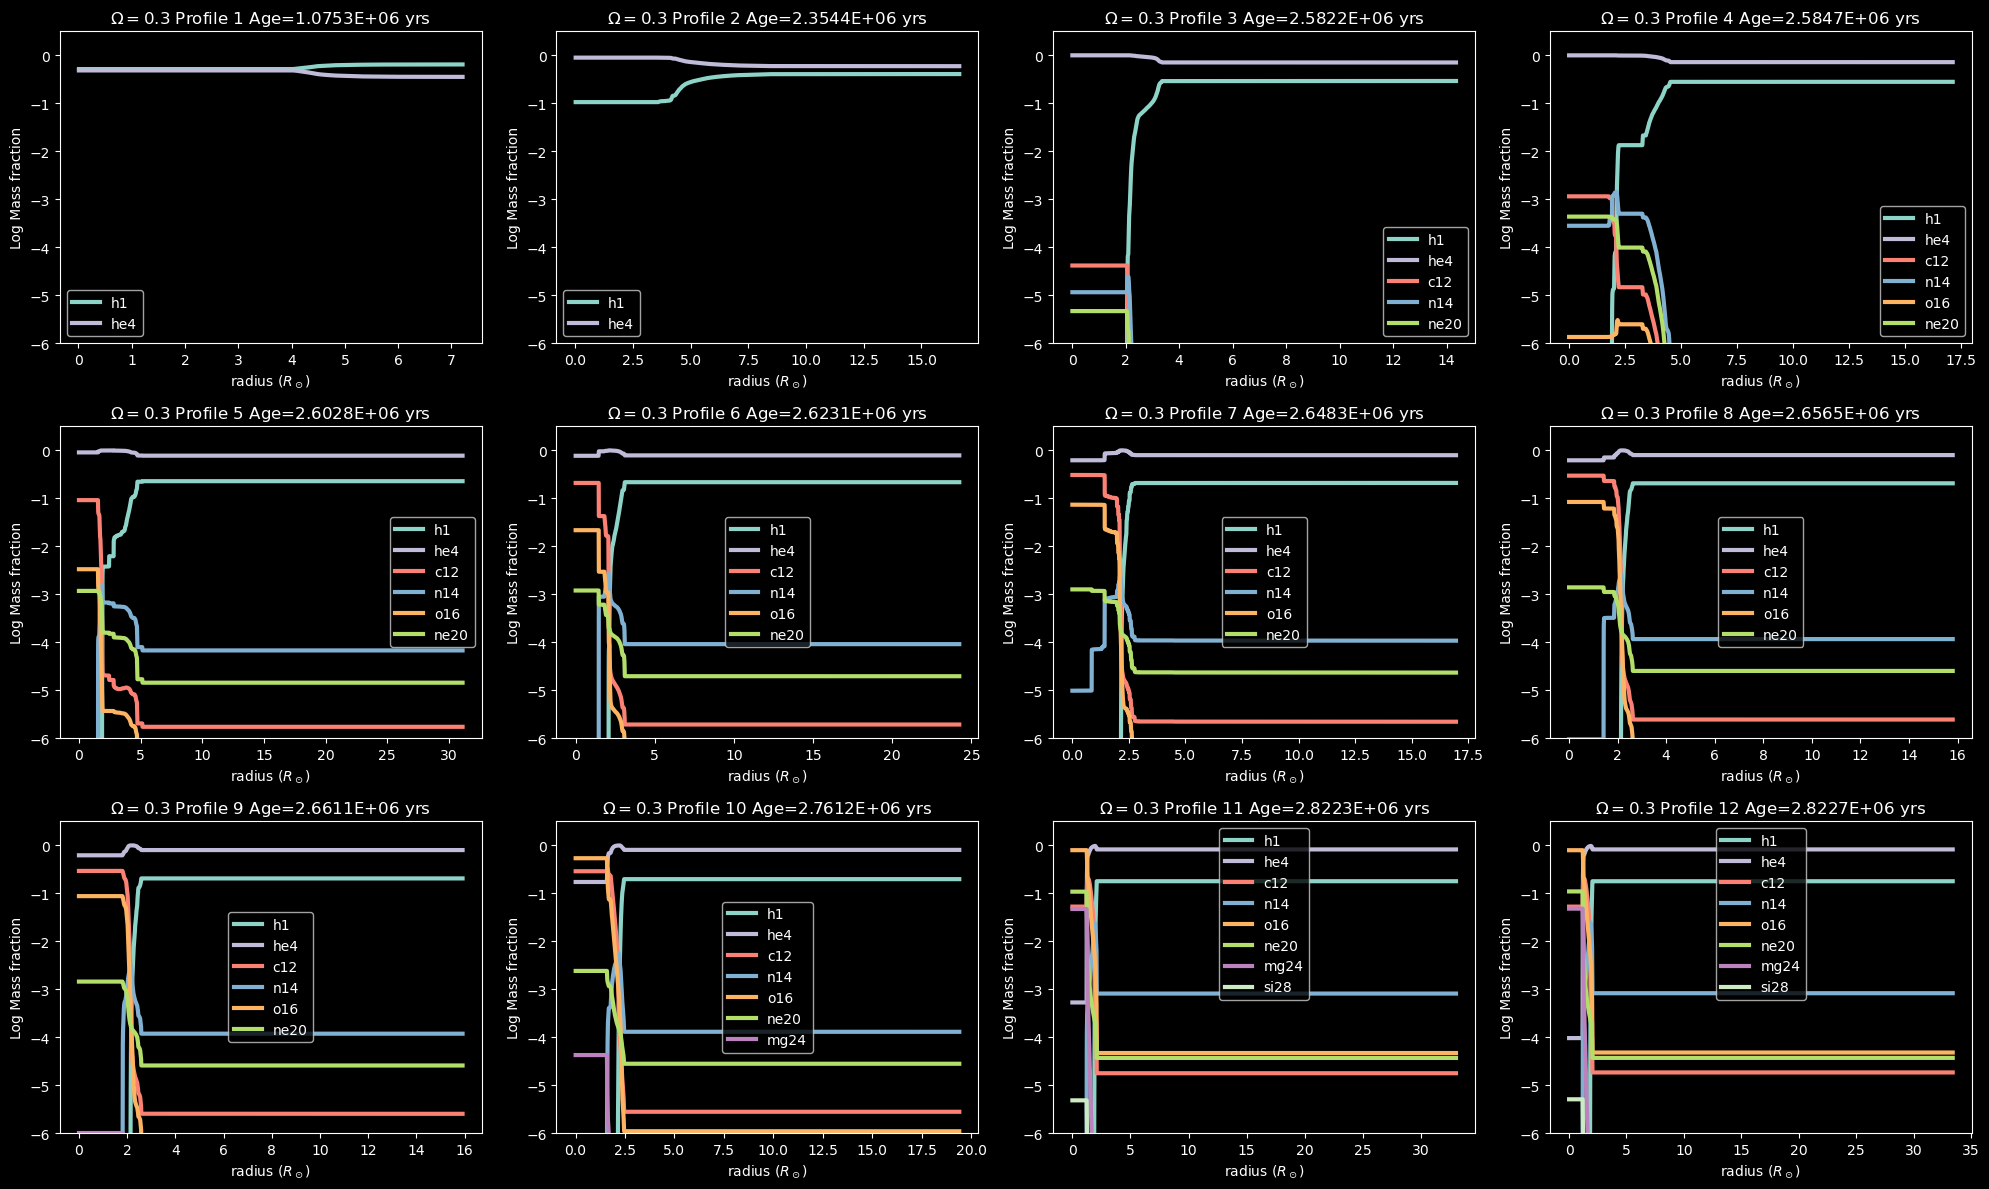

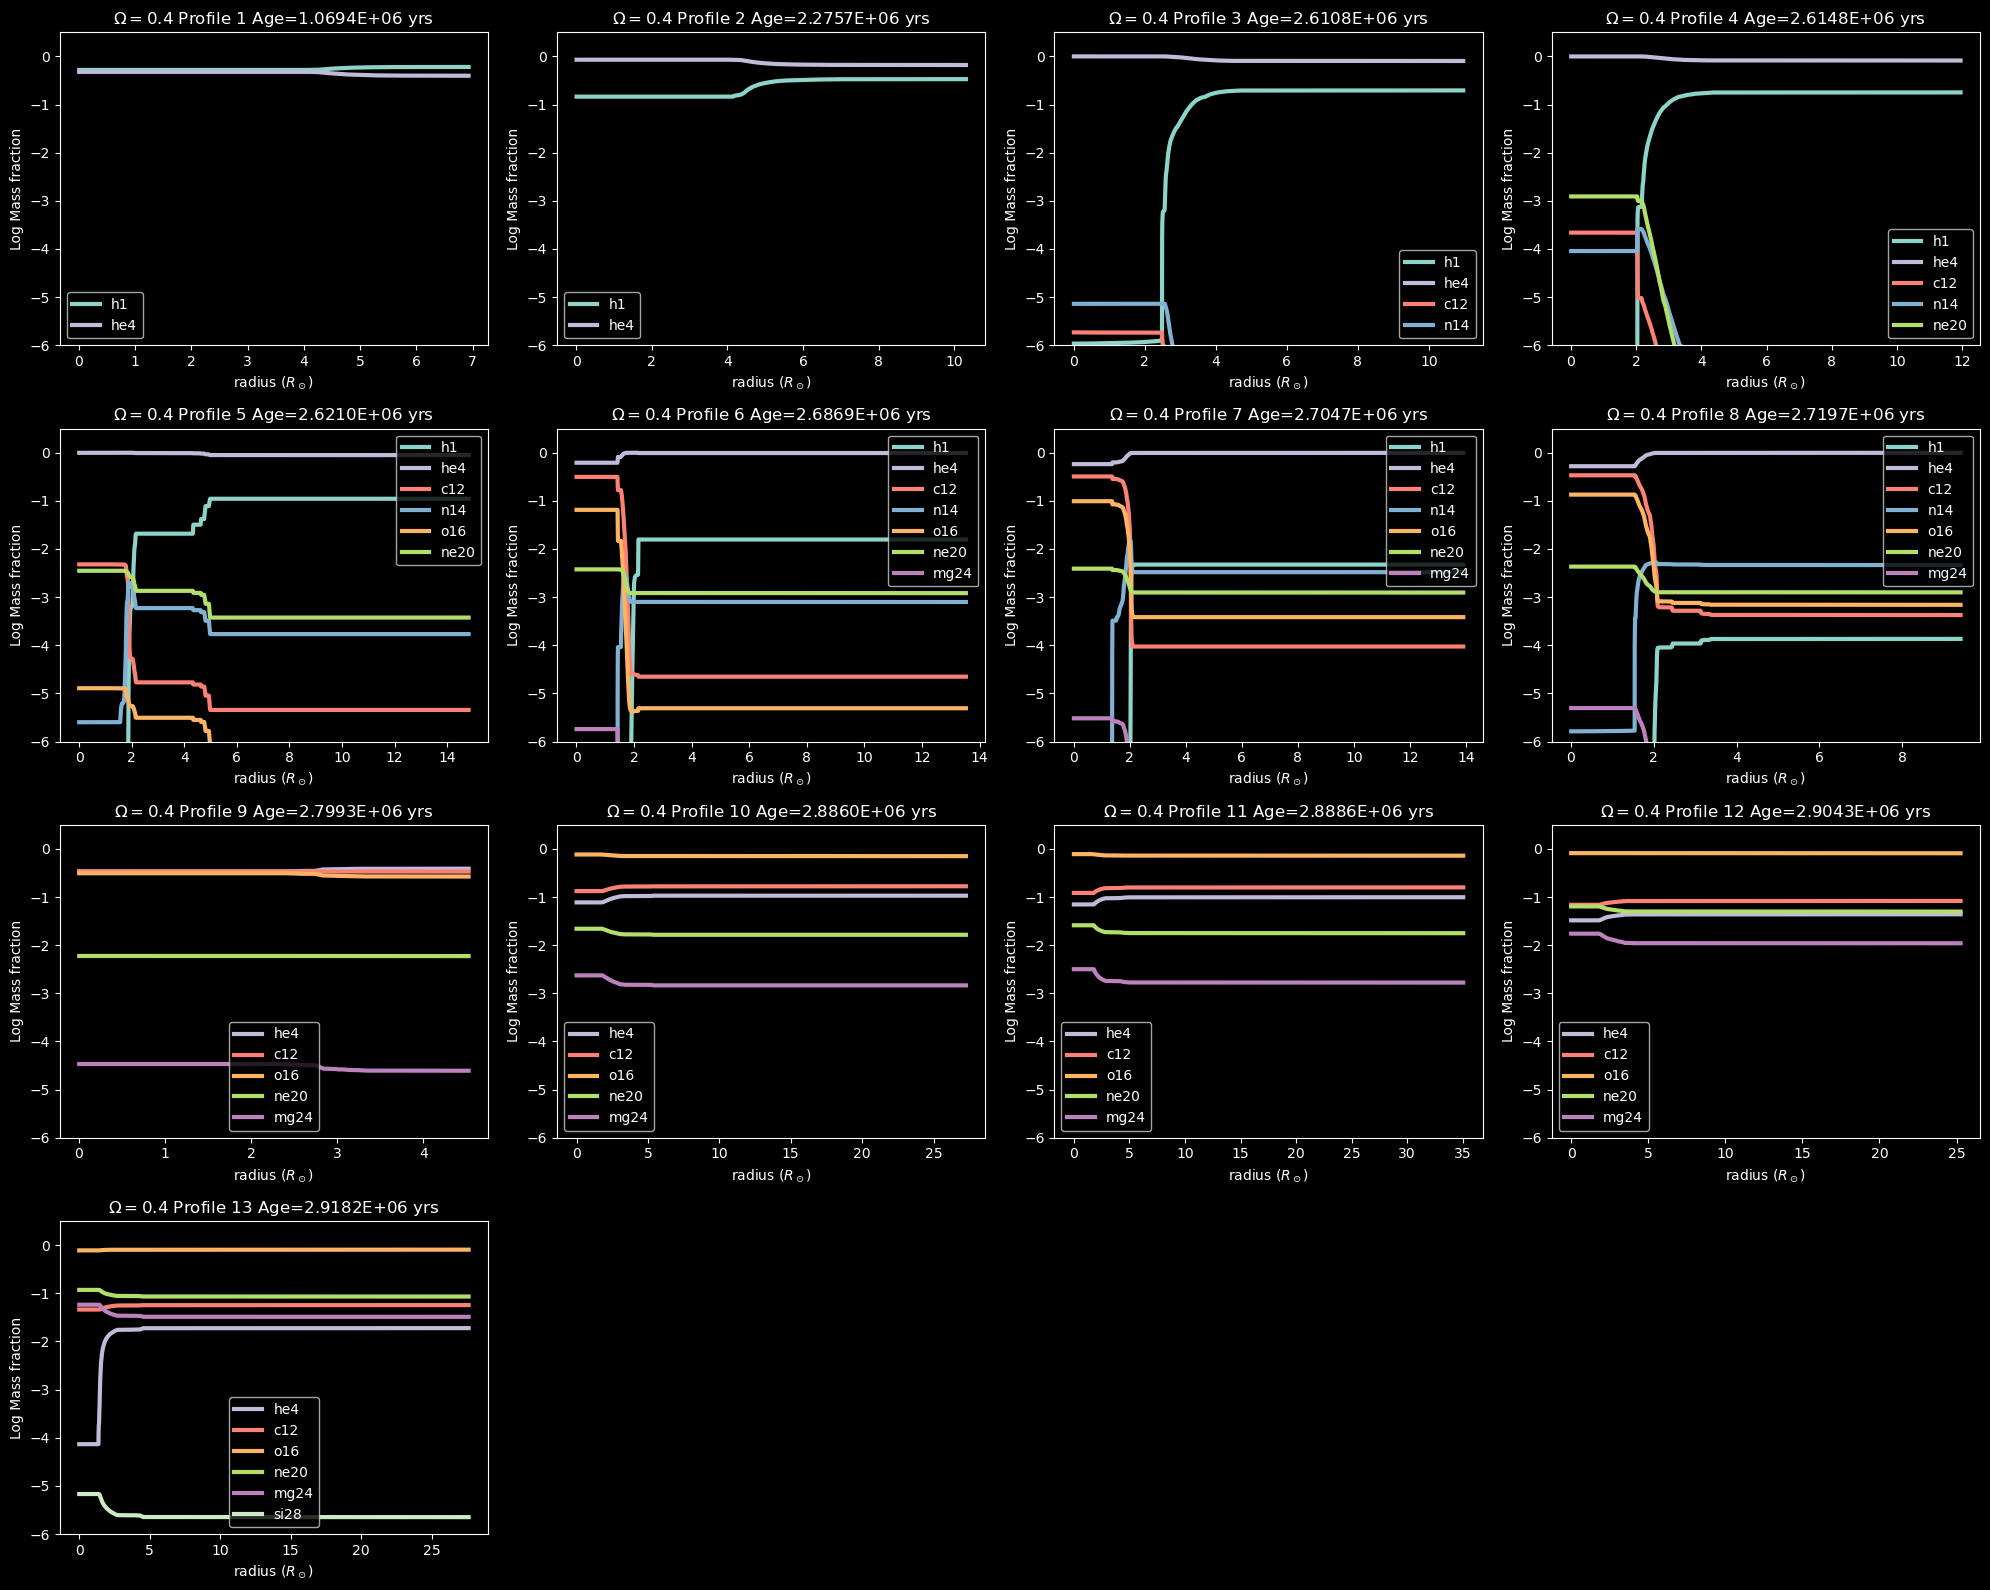

In [92]:
plot_mass_frac_det(prof_02, group_name=r'$\Omega/\Omega_{crit}=0.2$')
plot_mass_frac_det(prof_03, group_name=r'$\Omega=0.3$')
plot_mass_frac_det(prof_04alt, group_name=r'$\Omega=0.4$')

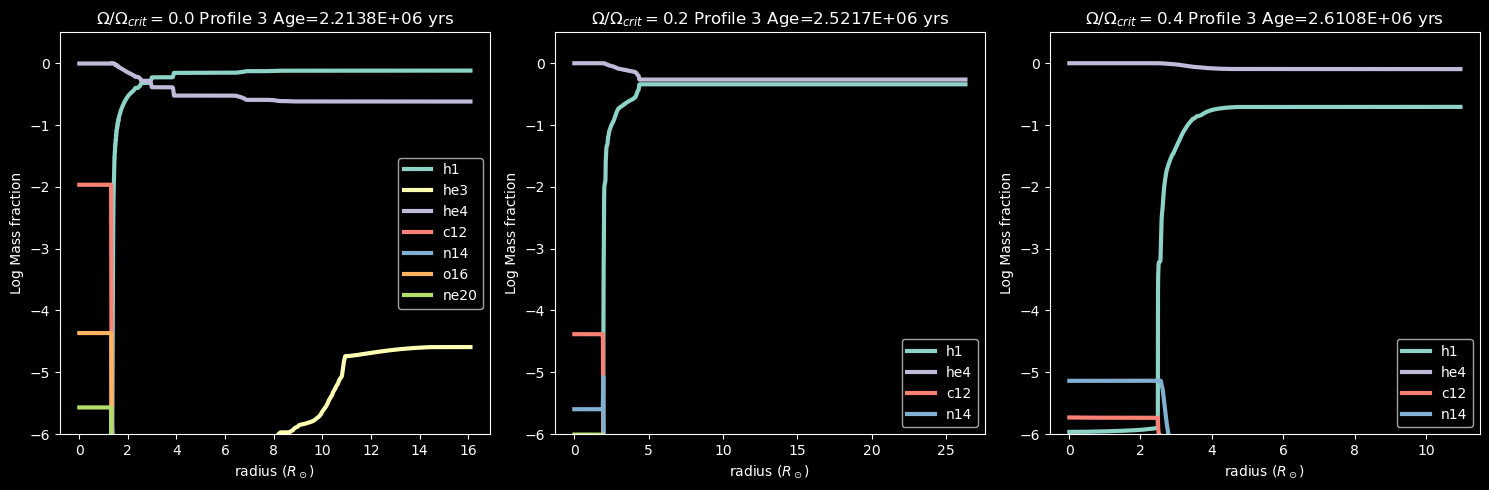

In [104]:
fig, ax = plt.subplots(1,3, tight_layout=True, figsize=(15,5))
plot_mFracs_for_profile_det(ax, prof_00alt[2], group_name=r'$\Omega/\Omega_{crit}=0.0$', i=0, prof_num=3)
plot_mFracs_for_profile_det(ax, prof_02[2], group_name=r'$\Omega/\Omega_{crit}=0.2$', i=1, prof_num=3)
plot_mFracs_for_profile_det(ax, prof_04alt[2], group_name=r'$\Omega/\Omega_{crit}=0.4$', i=2, prof_num=3)